## &#128640; 유니콘 기업 분석_Team4
- 유니콘 기업: 기업 가치 1조원 이상의 비상장 스타트업
- 시장 규모와 시장점유율, 현금 유동성, 기술 혁신성, 대표의 야망 등을 종합적으로 고려하여 기업 가치 평가

### &#9989; 분석 배경
- wanted는 구직자와 기업을 매칭하여 채용이 성사된 건에 대해 수수료를 받는 수익모델을 가지고 있다.
- 연매출액, 월별 연금보험료, 월별 직원수 등 현재 보유한 정보를 가지고 지속적으로 매출 및 채용 수요가 증가하는 유니콘 기업을 선별하고, 해당 기업의 소개 콘텐츠 및 채용 공고 등을 wanted 플랫폼에서 적극적으로 유통한다면 플랫폼 사용자 만족도 개선과 채용 건수 증가에 도움이 될 것으로 보인다.
-----
### &#9989; EDA 요약

- 연매출액, 월별 연금보험료, 월별 직원수가 큰 회사, 즉 회사의 규모가 커지면 커질수록 연매출액, 월별 연금보험료, 월별 직원수의 분포가 넓게 나타난다.
- 연매출액이 가장 큰 규모의 회사들 중 월별 연금 보험료와 월별 직원수가 더 많아질수록 1인당 매출액이 작아진다.
- 직원이 많을수록 지급되는 급여(고정비)도 함께 많아지는 것으로 추측되며, 매출에 기여하는 직원별 가치는 비교적 적다고 판단된다.
------
1. 따라서 적정 수준의 직원과 연금보험료를 내면서도 높은 매출액을 유지하는 회사가 가치가 큰 것으로 보인다.
2. 연매출액 기준 규모가 큰 기업들을 선분류하고, 그 안에서 미시적인 분석을 진행한다.
3. 회사의 규모가 큰 그룹일수록 데이터의 분포가 매우 넓기 때문에, 값의 절대 가치보다는 성장률에 초점을 맞춰 분석을 진행한다.

### &#9989; 유니콘 기업 선정 분석의 가설

1. 해당연도 연매출액이 1,000억원을 초과하는 기업 중
2. **연매출액 성장률, 연 기준 월별 연금보험료 중위값 상승률, 연평균 직원수 상승률, 연평균 1인당 매출액 상승률**의 평균이 급상승한 기업이 유니콘 기업일 것이다.
------
### &#128640; 유니콘 기업 선정 분석의 방법

1. 연매출액이 1,000억원을 초과하는 기업 필터링
2. 연매출 성장률, 연평균 직원수 성장률, 연금보험료 중위값 상승률, 1인당 매출액 상승률을 바탕으로 유니콘 지수 산출
3. 유니콘 지수(P_unicorn)가 높은 기업 선정 (+클러스터링을 통한 Cross check)
------
#### (실제 분석 결과) 국내 유니콘 등재 기업 데이터를 살펴보았을 때 매출액, 직원수 분포에는 다소 차이가 있었으나, 연매출액이 폭발적으로 성장한 구간이 있었고 직원수 및 연금보험료 또한 성장세를 보였다는 공통점이 있었음

![실제 유니콘 기업](https://i.esdrop.com/d/BzPR8Oym5h.png)

### &#10010; EDA 상세

#### import 모듈

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Hierarchical clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

#### PC 세팅

In [2]:
%matplotlib inline
sns.set_style(style="white")
sns.set()

# (Windows OS) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'MalgunGothic'  
# (MAC OS)
plt.rcParams['font.family'] = 'AppleGothic'  
# 문자 - (마이너스) 정상 출력을 위한 코드
plt.rcParams['axes.unicode_minus'] = False
# 경고 제거
plt.rcParams.update({'figure.max_open_warning': 0})
# 노트북 세팅
pd.options.display.float_format = '{:.2f}'.format

#### 데이터 Read

In [3]:
# 데이터 파일 read (각자의 경로 입력)
wanted_nps_df=pd.read_csv('/Users/jaehwan/Desktop/송재환/DS_Project/company_nps_data.csv', encoding='cp949')

wanted_nps_df.info()
wanted_nps_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


회사ID           연매출액       년도        월     월별_연금보험료   월별_직원수
count   99801.00       99801.00 99801.00 99801.00     99801.00 99801.00
mean   276298.17    30535893.43  2016.97     6.71   9734079.21    37.62
std    133903.15   301664669.02     0.98     3.51  43472560.17   146.95
min        63.00    -7882176.00  2015.00     1.00         0.00     0.00
25%    165530.00     1409760.00  2016.00     4.00   1181160.00     6.00
50%    259149.00     3573585.00  2017.00     7.00   2332760.00    11.00
75%    382656.00     9582321.00  2018.00    10.00   5591860.00    24.00
max   5159723.00 11328779396.00  2019.00    12.00 978067260.00  3133.00

### &#10145; 데이터 전처리
* 직원이 0명인 경우와 연매출액이 마이너스인 경우 제외 처리
* 직원별로 매출에 기여하는 정도를 평가하기 위해 1인당 매출액을 보여주는 컬럼 추가

In [4]:
# 이상치 제외
wanted_nps_df = wanted_nps_df.drop(index=wanted_nps_df.query('연매출액 < 0').index)
wanted_nps_df = wanted_nps_df.drop(index=wanted_nps_df.query('월별_직원수 == 0').index)

# 직원 1인당 매출액 컬럼 추가
wanted_nps_df.loc[:,'인당_매출액'] = wanted_nps_df.loc[:, '연매출액'] / wanted_nps_df.loc[:, '월별_직원수']

# 회사ID 고유 건수
print("전처리 후 기업 수: ", len(set(wanted_nps_df['회사ID'])))

# 데이터의 통계량
wanted_nps_df.describe()

전처리 후 기업 수:  4998


회사ID           연매출액       년도        월     월별_연금보험료   월별_직원수  \
count   99776.00       99776.00 99776.00 99776.00     99776.00 99776.00   
mean   276263.21    30544049.77  2016.97     6.71   9736289.82    37.63   
std    133891.07   301701995.99     0.98     3.51  43477779.16   146.96   
min        63.00         300.00  2015.00     1.00     90000.00     3.00   
25%    165530.00     1409955.00  2016.00     4.00   1181815.00     6.00   
50%    259149.00     3573585.00  2017.00     7.00   2334120.00    11.00   
75%    382651.00     9592327.00  2018.00    10.00   5592145.00    24.00   
max   5159723.00 11328779396.00  2019.00    12.00 978067260.00  3133.00   

           인당_매출액  
count    99776.00  
mean    594450.03  
std    1477181.20  
min         75.00  
25%     141982.52  
50%     286197.50  
75%     586500.00  
max   50784748.67

### &#10145; 데이터 통계
> * 4998개 기업의 2015년~2019년까지의 데이터 (날짜는 기업별 상이)
* (참고) 각 Row 기준의 통계 / 회사, 일자 구분 X

>- 최대 연매출액: 약 11조 3천억원
- 최대 월별 연금보험료: 약 9억 7천만원
- 최대 월별 직원수: 약 3100명

>- 평균 연매출액: 약 300억원
- 평균 월별 연금보험료: 약 970만원
- 평균 월별 직원수: 약 37명

>- 최소 연매출액: 약 30만원
- 최소 월별 연금보험료: 약 9만원
- 최소 월별 직원수: 3명

### &#10145; 데이터의 전반적인 분포 확인을 위한 히스토그램
- 값이 작은 회사가 압도적으로 많기 때문에 전체적인 내용 확인을 위해 값에 log를 적용

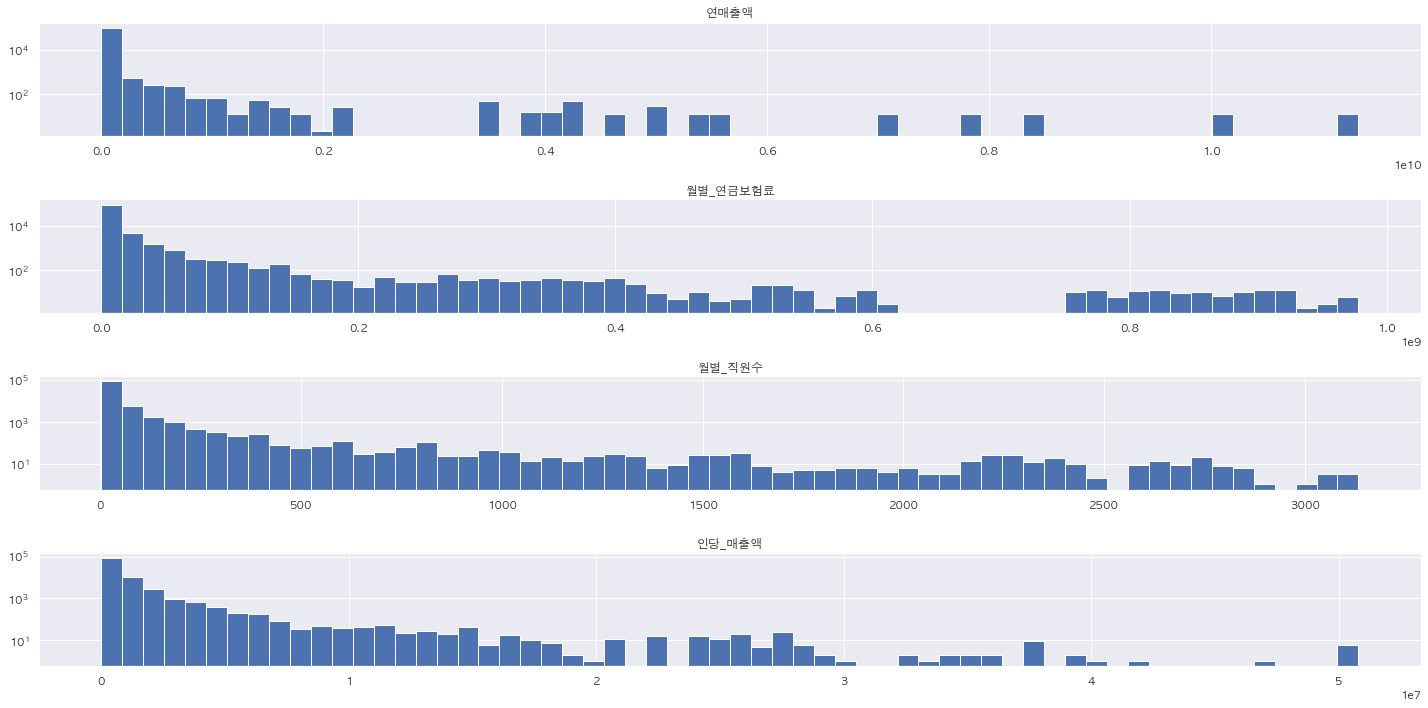

In [5]:
wanted_nps_df.hist(bins=60, column=['연매출액','월별_연금보험료','월별_직원수','인당_매출액'],
                   figsize=(20,10), layout=(4,1), log=True);
plt.tight_layout()

### &#10145; Binning 작업 수행하여 bin별 경향성 확인

In [6]:
# 위 히스토그램의 영역을 binning하여 그룹핑, 본 작업을 통해 항목 규모별 데이터 분포 및 특징 파악
# binning 작업: 데이터를 값으로 오름차순 정렬하여, 동일한 개수가 되도록 bin 그룹을 나눔

# 전체 Rows를 기준으로 5개의 bin으로 구분
n_bins = 5
# bin의 이름(라벨)
bin_labels = list(range(1,n_bins+1))

for column in ['연매출액','월별_연금보험료','월별_직원수','인당_매출액']:
    new_column = column+"bin"
    wanted_nps_df.loc[:,new_column] = pd.qcut(wanted_nps_df[column], n_bins, labels=bin_labels)
    
wanted_nps_df

회사ID      연매출액    년도   월  월별_연금보험료  월별_직원수     인당_매출액 연매출액bin  \
0      233757  41688077  2018   7   8912380      36 1158002.14       5   
1      123464   1760695  2018   3    942380       5  352139.00       2   
2      342124   3221341  2018   7    781180       4  805335.25       3   
3      386420   4815584  2015  11   3795900      14  343970.29       3   
4      129243   9799736  2018  10  40724680     151   64898.91       4   
...       ...       ...   ...  ..       ...     ...        ...     ...   
99796  171439   4630622  2017   2   2402740      11  420965.64       3   
99797  239388   1045021  2018  10   1428800       9  116113.44       1   
99798  272304    181898  2018   3    392560       4   45474.50       1   
99799  362194   2100218  2018  12    874780       3  700072.67       2   
99800  124281    132900  2017  11    291940       5   26580.00       1   

      월별_연금보험료bin 월별_직원수bin 인당_매출액bin  
0               5         5         5  
1               1         1         3  
2               1         1         5  
3               4         3         3  
4               5         5         1  
...           ...       ...       ...  
99796           3         3         4  
99797           2         3         1  
99798           1         1         1  
99799           1         1         4  
99800           1         1         1  

[99776 rows x 11 columns]

### &#10145; Binning을 기준으로 데이터 EDA (Boxplot & Scatter chart 활용)<br>

#### 1. Boxplot 해석 요약

--------

- 각 항목별 bin이 5번에 가까워질수록 (규모가 커질수록) 항목별 양적 성장이 확인된다.
- 특히 1인당 매출액bin이 5번에 가까워질수록 연매출액, 월별 연금보험료, 월별 직원수의 극적인 양적 성장이 확인된다.
- 연매출액은 가장 크지만, 1인당 매출액이 가장 적은 bin일수록 월별 연금보험료와 월별 직원수 분포가 매우 넓어진다. 
- 각 항목별 bin 모두 양적 성장이 극적으로 증가할수록 상위 50%의 분포가 매우 넓어진다. 

##### (추론)
1. 회사의 규모가 커질수록 급격한 양적 성장이 이뤄지는 것으로 추측.
2. 특히 1인당 매출액이 커질수록 더 급격한 양적 성장이 이뤄지는 것으로 추측.<br>하지만 상위 50% 기준으로 분포가 매우 넓어지기 때문에 기업별 격차가 심한 것으로도 보임.
3. 직원이 많을수록 매출 대비 급여(고정비)가 많아지는 것으로 추측.


 ##### (정리)
1. 연매출액과 1인당 매출이 함께 크면서도, 직원이 적어 고정비가 적게 운영될 수 있는 기업이 더 높은 가치를 가진 것으로 보인다.
2. 규모가 큰 기업들은 분포가 넓어 미시적인 분석이 필요할 것으로 보임.

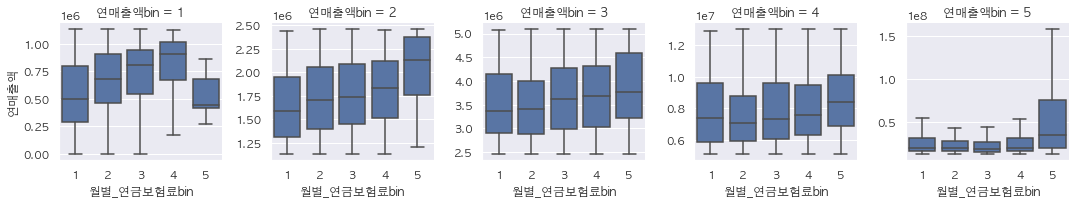

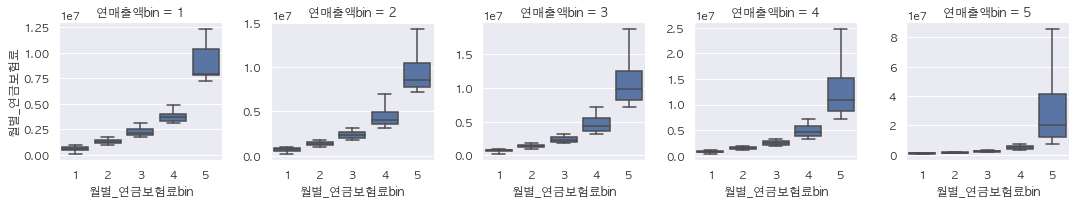

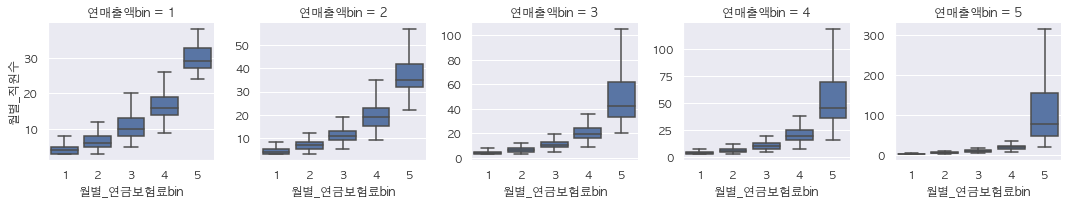

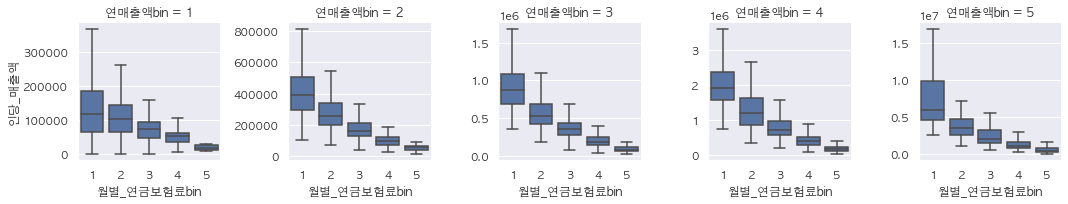

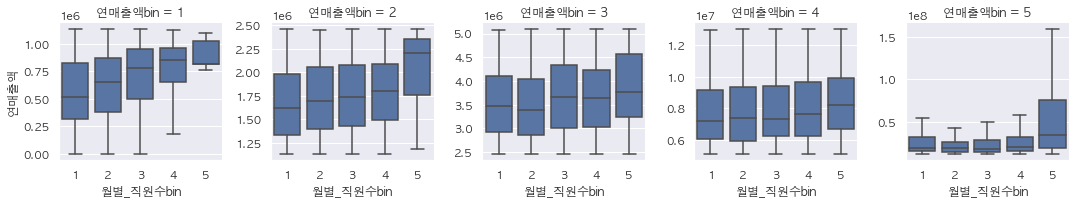

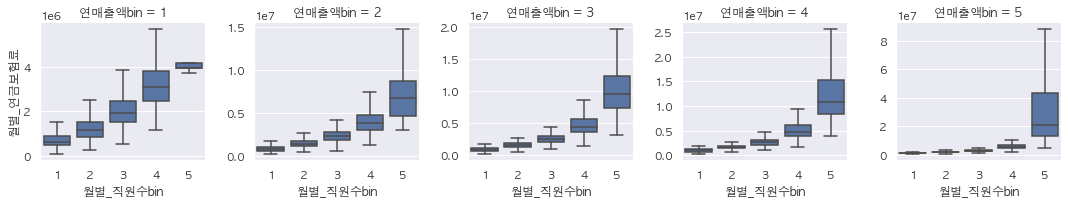

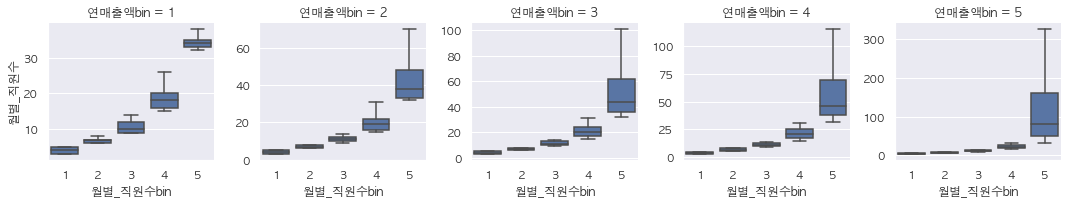

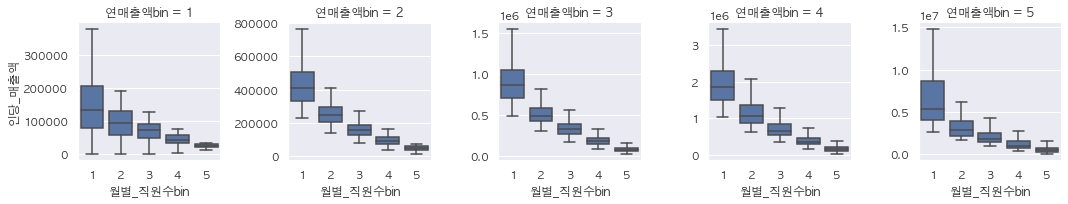

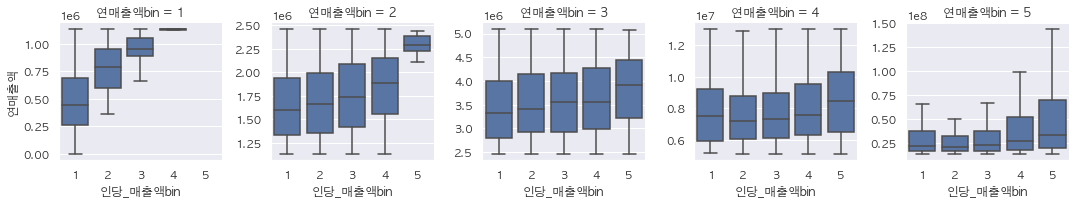

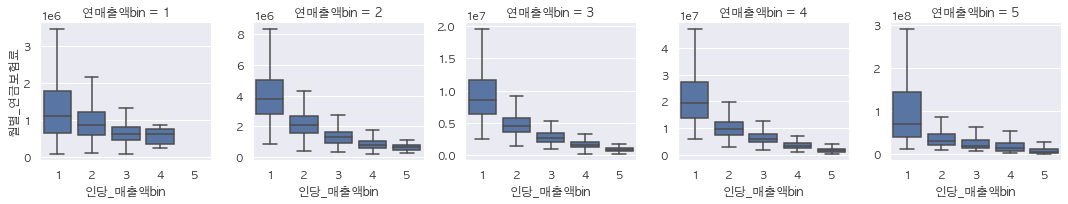

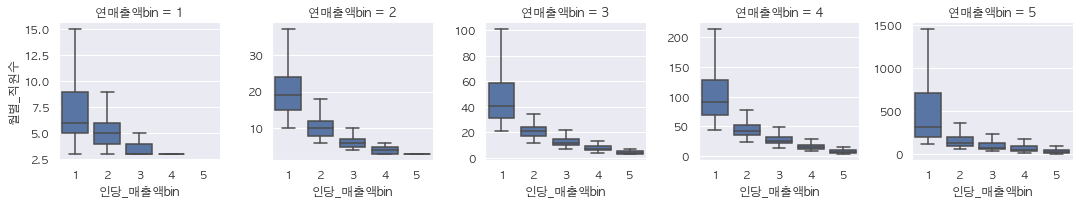

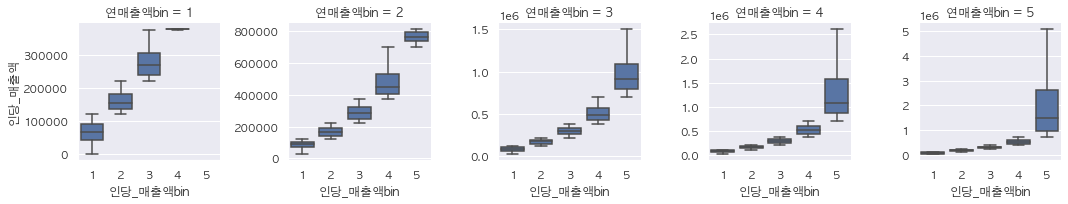

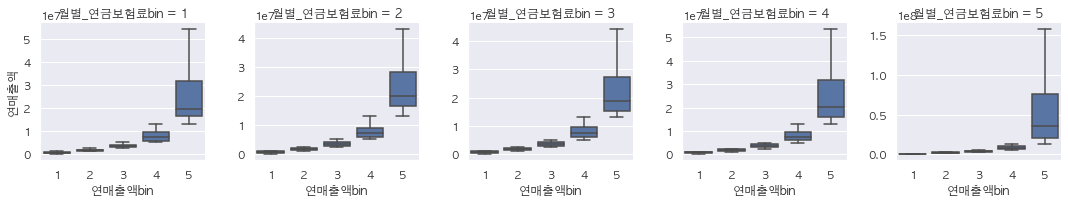

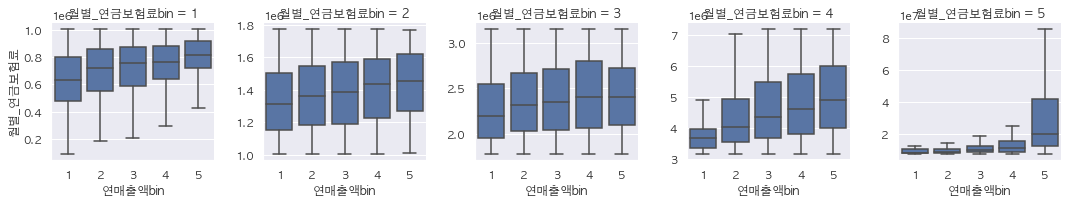

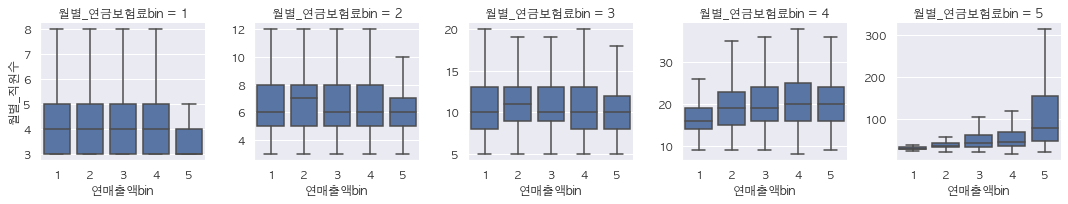

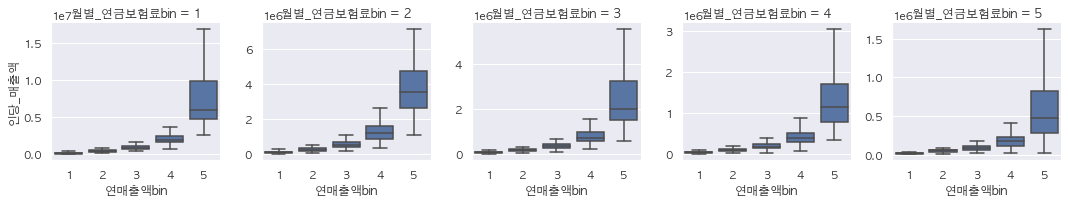

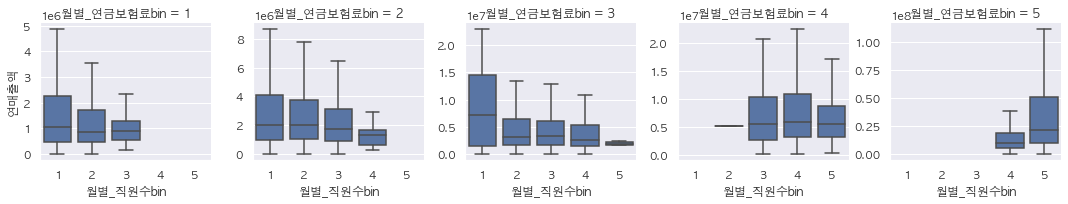

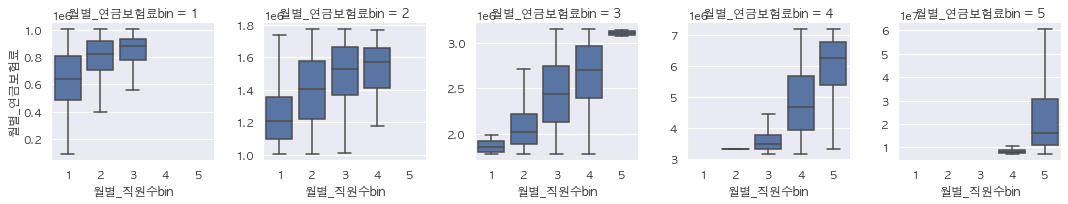

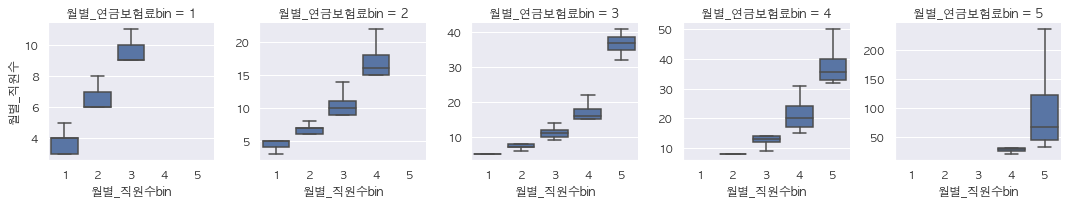

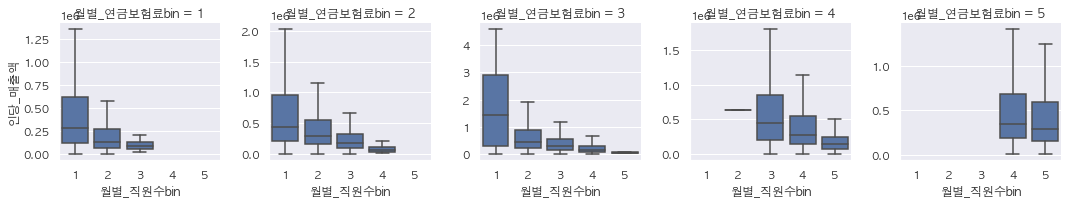

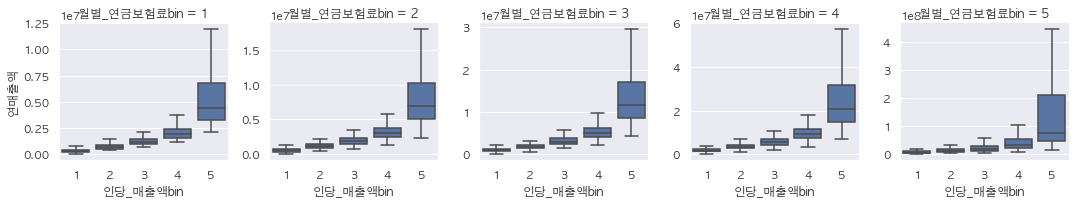

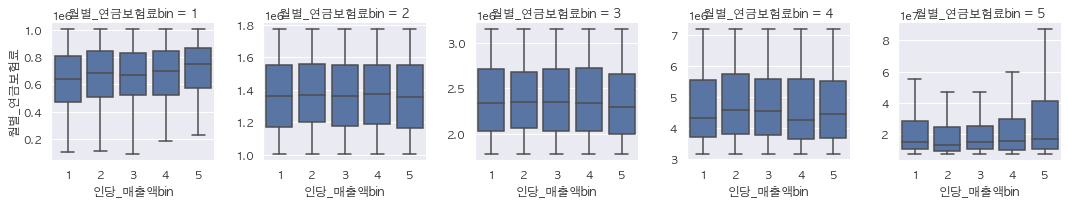

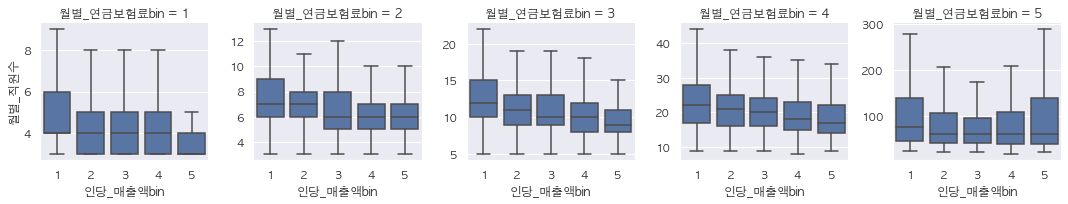

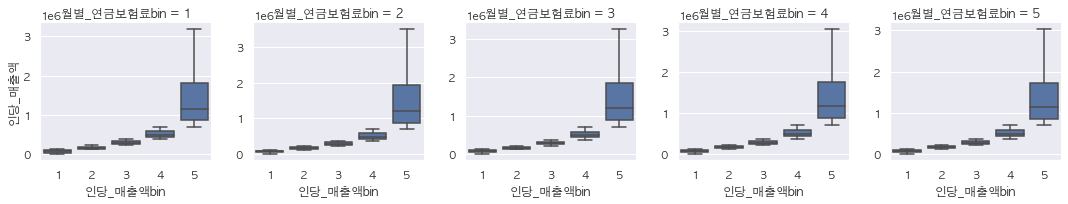

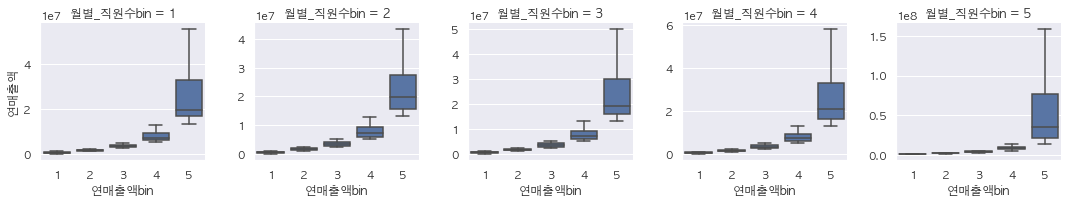

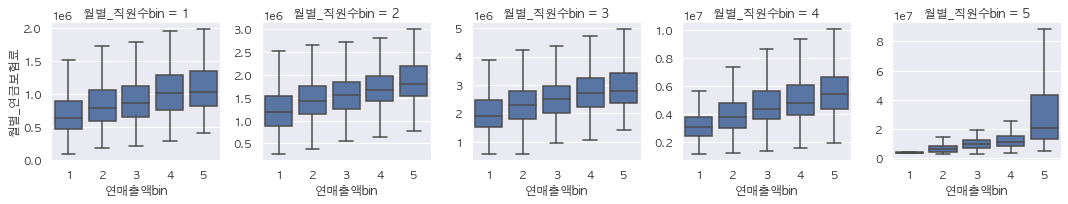

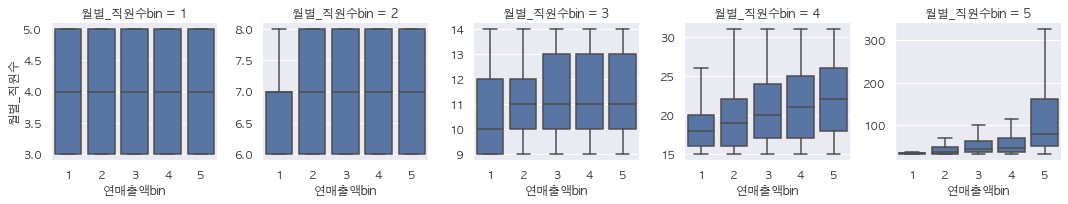

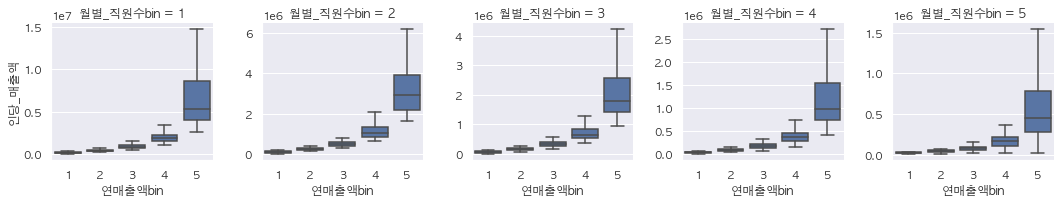

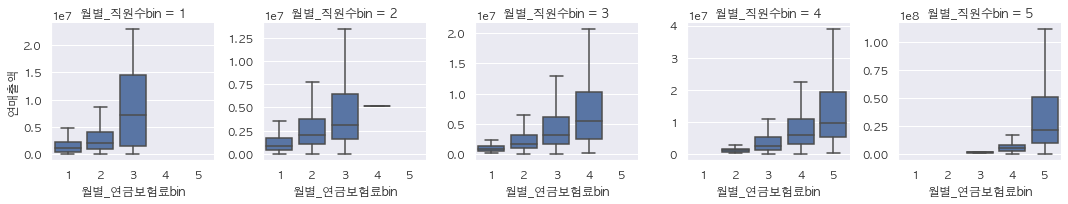

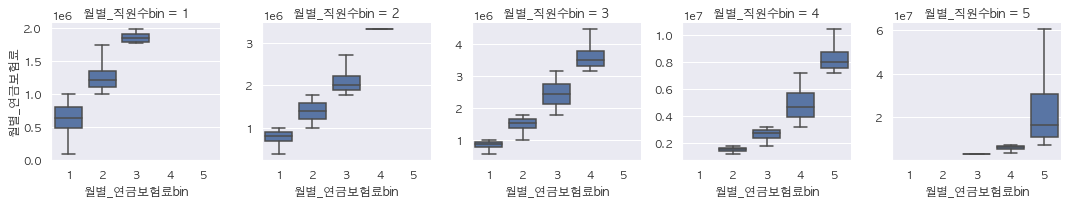

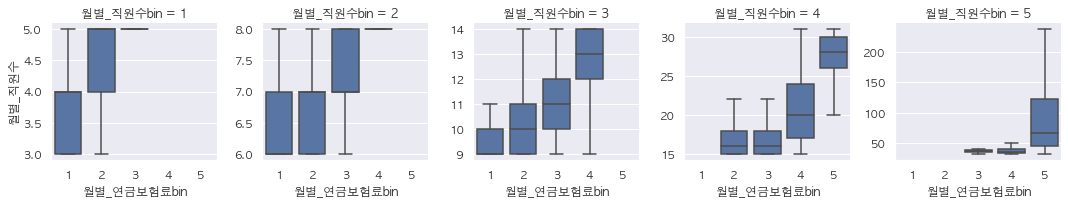

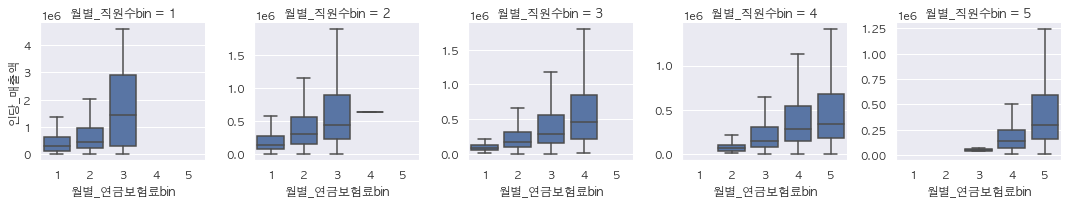

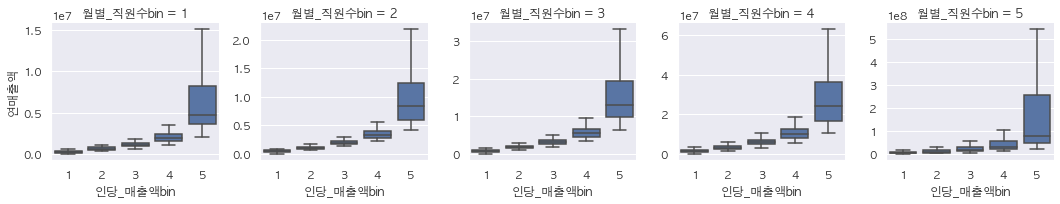

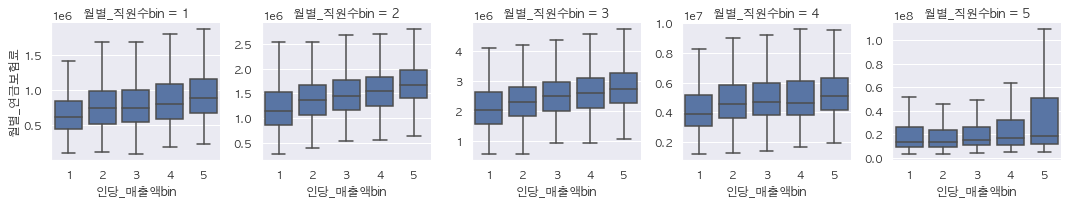

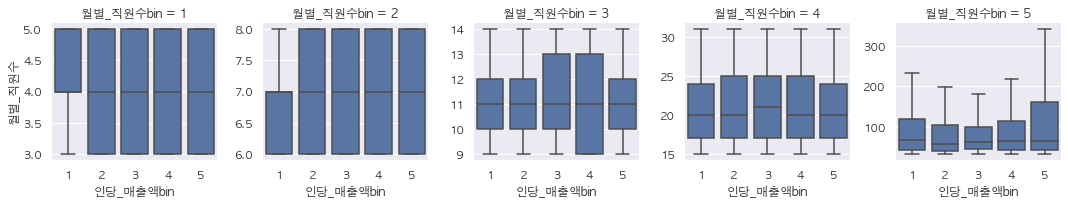

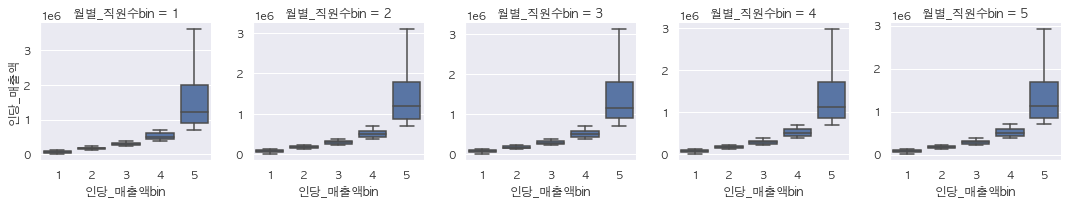

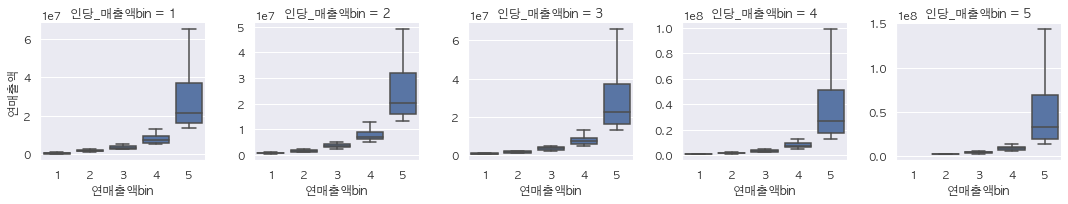

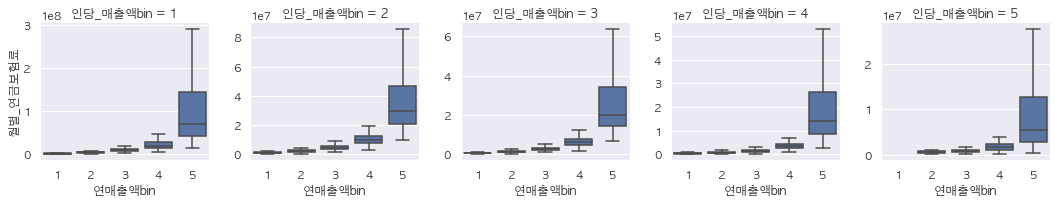

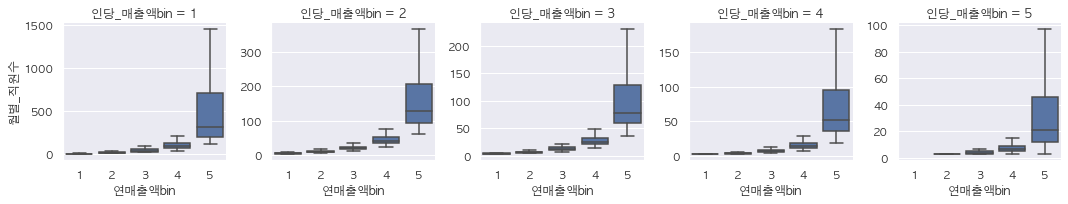

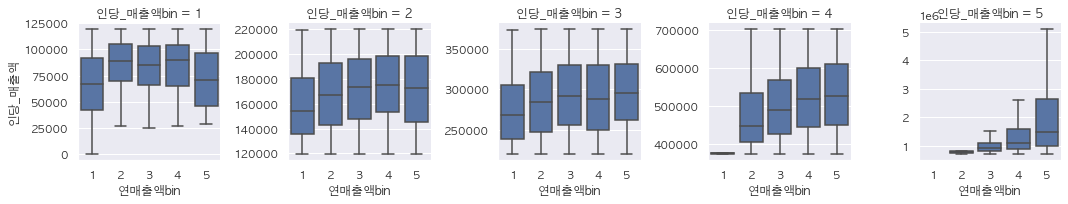

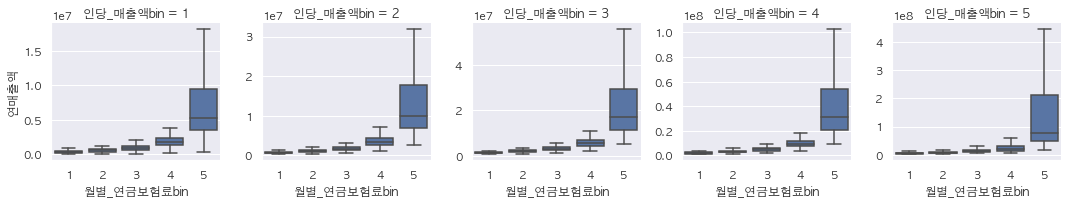

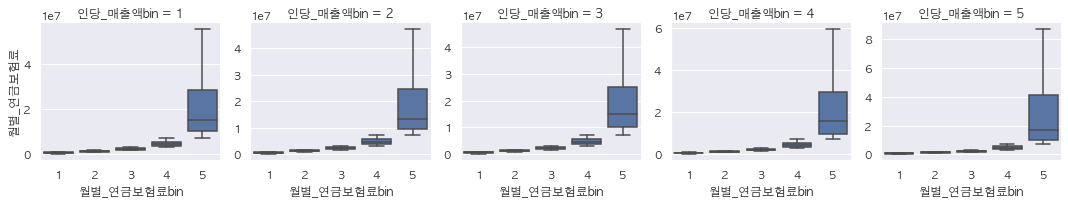

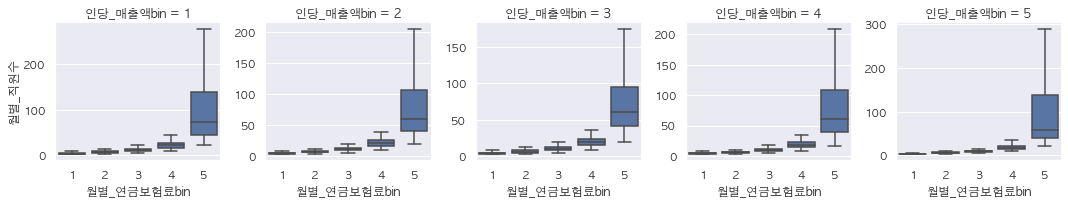

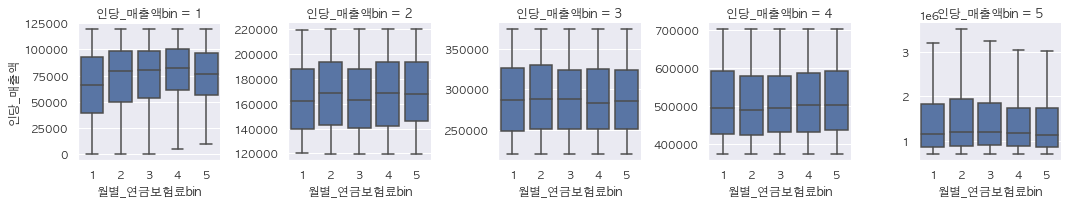

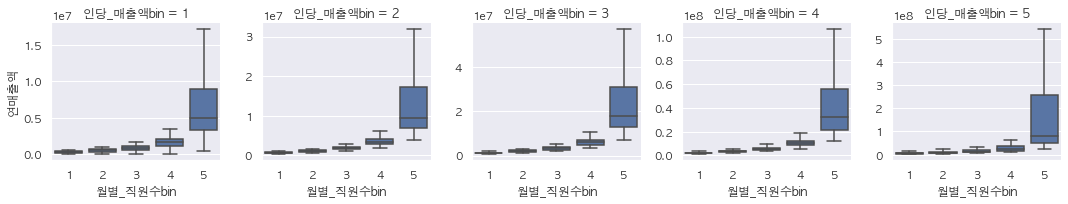

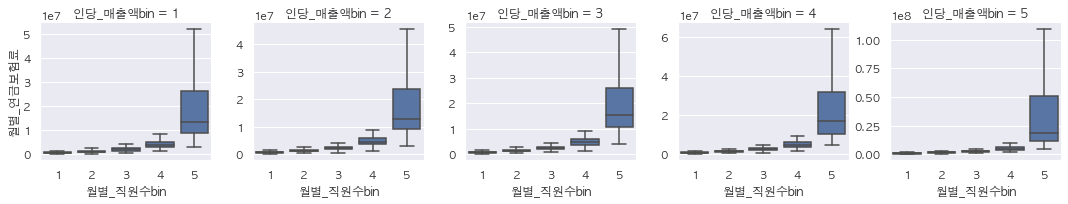

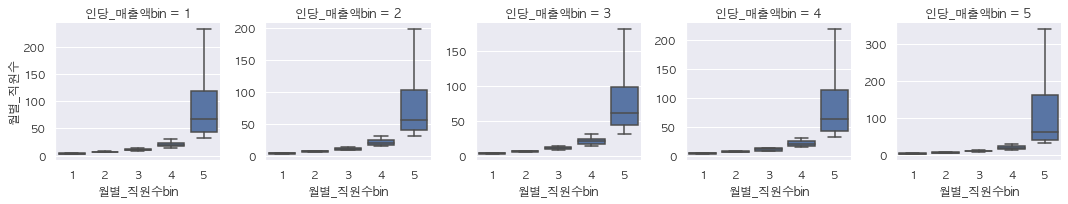

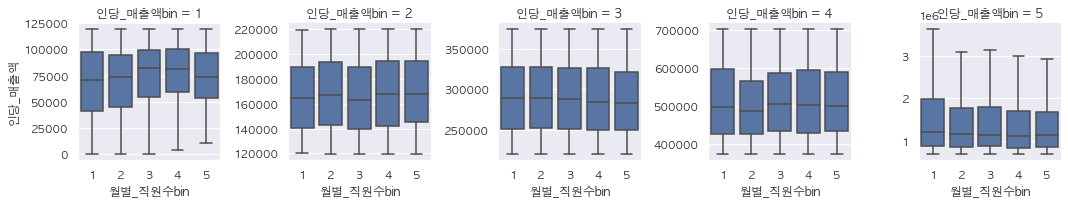

In [7]:
# 마스터 컬럼 리스트
boxplot_bin_column = ['연매출액bin','월별_연금보험료bin', '월별_직원수bin','인당_매출액bin']

# 마스터 컬럼 리스트를 기준으로 구분
for column in boxplot_bin_column:
    
    for column_2 in boxplot_bin_column:
        # X축이 마스커 컬럼 리스트 구분과 같지 않은 경우 (ex. '연매출액bin' 기준으로 차트를 구분하는데, '연매출액bin'이 X축으로 안쓰이는 경우)
        if column_2 != column:
            # Y축은 '연매출액','월별_연금보험료','월별_직원수', '1인당_매출액' 네 가지 경우 모두 확인
            for column_3 in boxplot_bin_column:
                g = sns.FacetGrid(wanted_nps_df, col=column, sharey=False)
                g.map(sns.boxplot, column_2, column_3[:-3], order=bin_labels, showfliers=False);

#### 2. Scatter chart 해석 요약

--------

- 전체적으로 일정 규모 이상의 회사는 월별 직원수, 월별 연금보험료와 연매출액이 양의 상관관계가 있다.
- 하지만 1인당 매출액은 연매출액, 월별 연금보험료, 월별 직원수와 아주 약한 음의 상관관계를 보인다.
- 또한, 월별 연금보험료 납부의 규모가 큰 기업일수록, 연매출액과 1인당 매출액의 관계가 약해진다.

##### (추론)
1. 월별 직원수와 월별 연금보험료의 증가가 연매출액 성장과 관련 있음을 확인할 수 있다.
2. 하지만 직원수가 많고, 월별 연금보험료가 많은 회사일수록 직원 1명당 매출에 기여하는 가치와의 관련성은 약해짐을 알 수 있다.

##### (정리)
1. 적정 수준의 직원과 연봉을 유지하면서, 매출이 높은 회사가 가치가 큰 회사로 보인다.

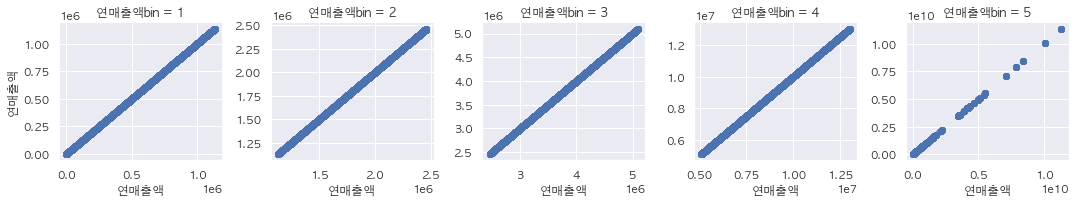

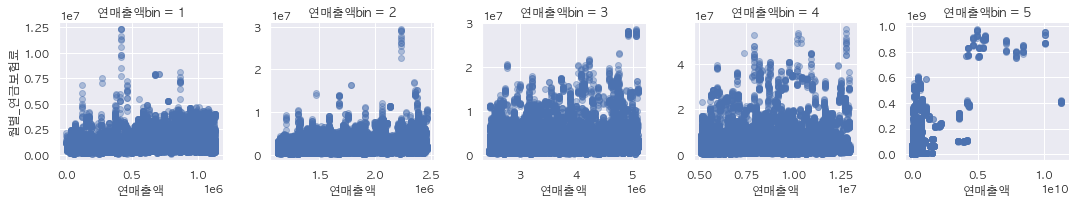

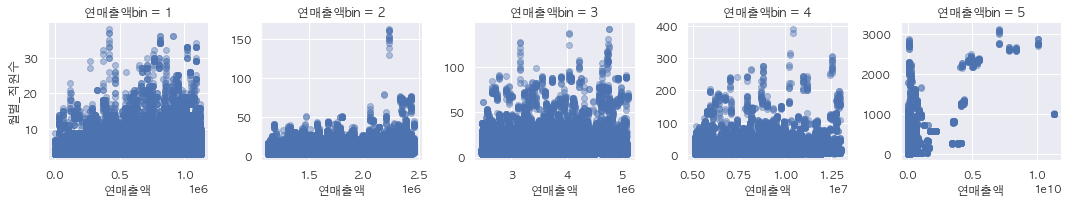

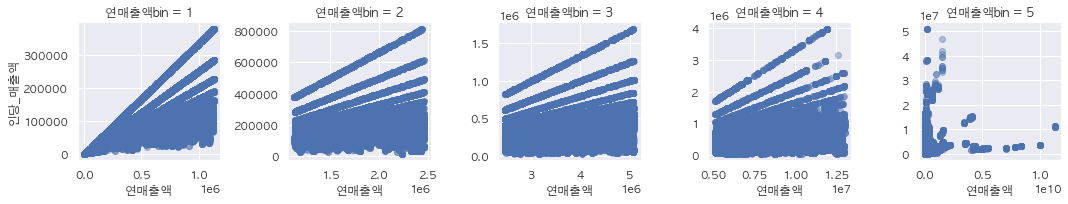

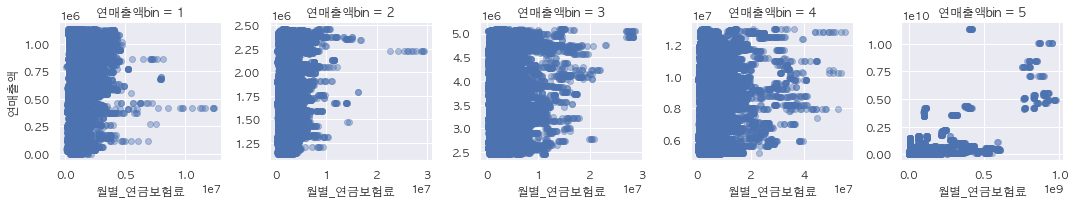

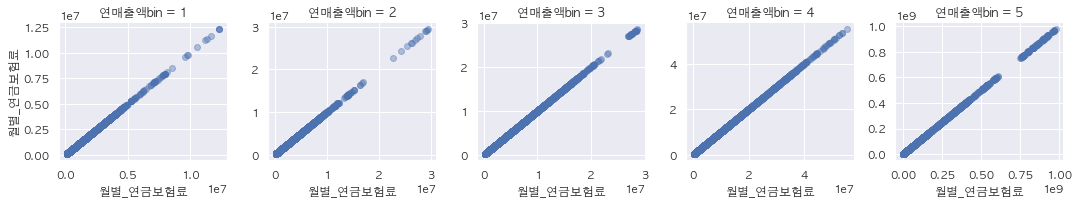

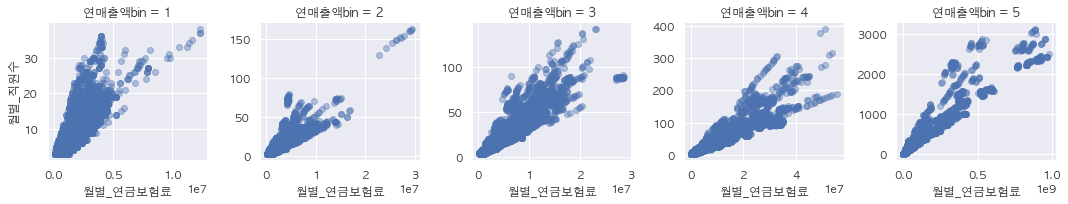

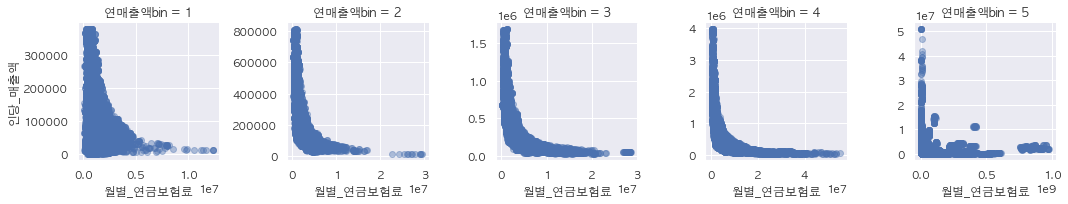

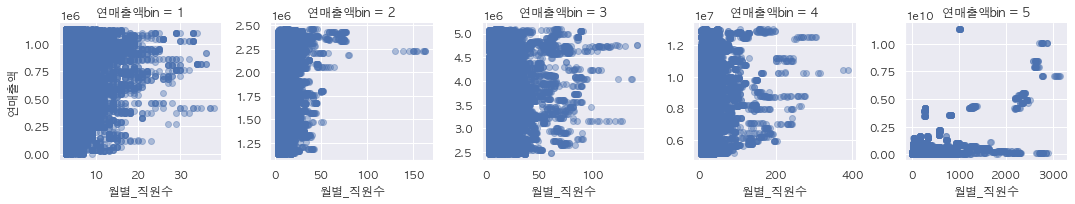

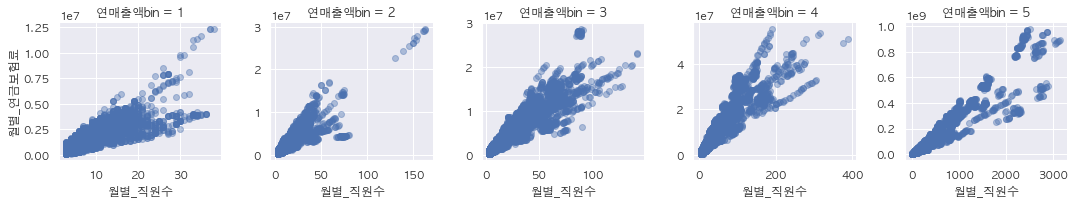

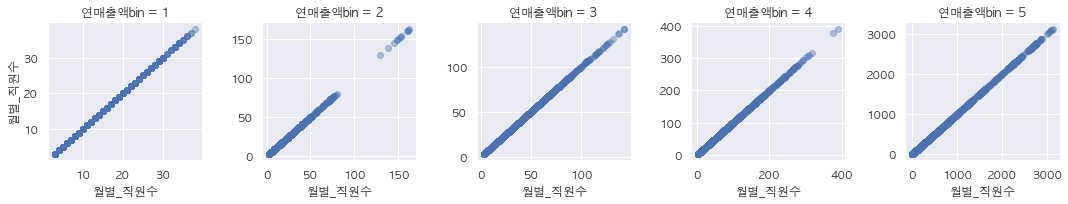

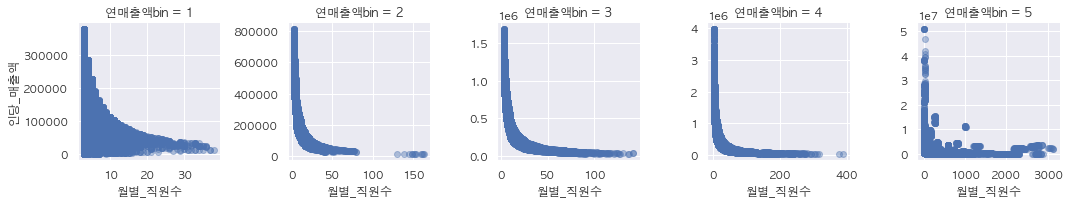

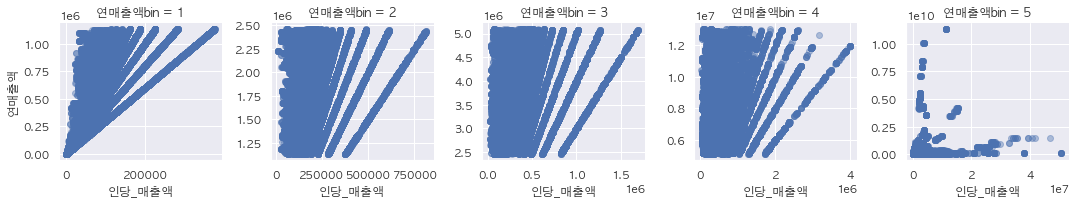

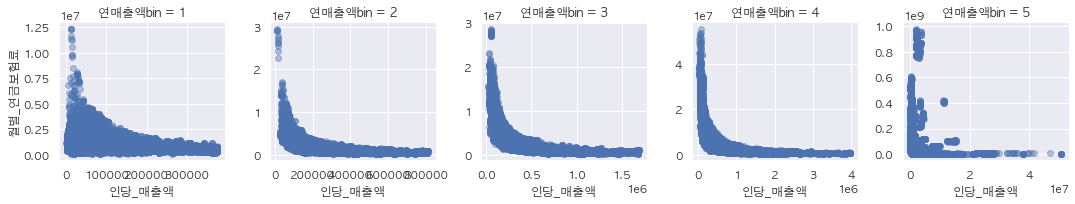

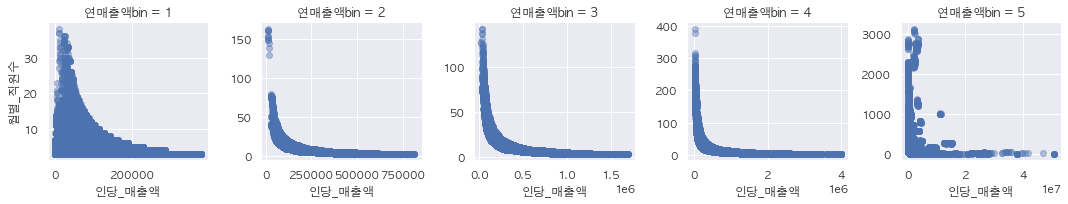

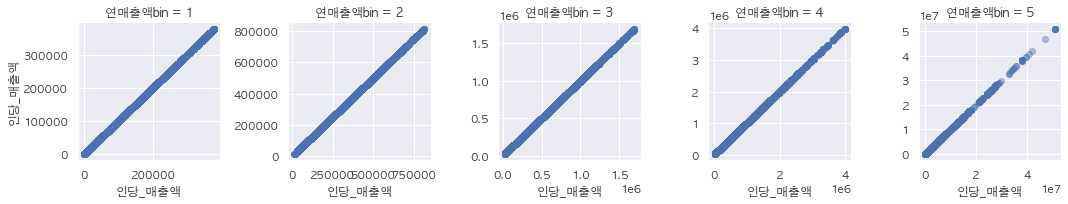

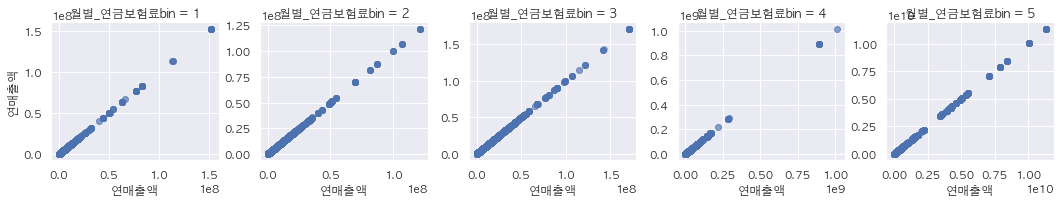

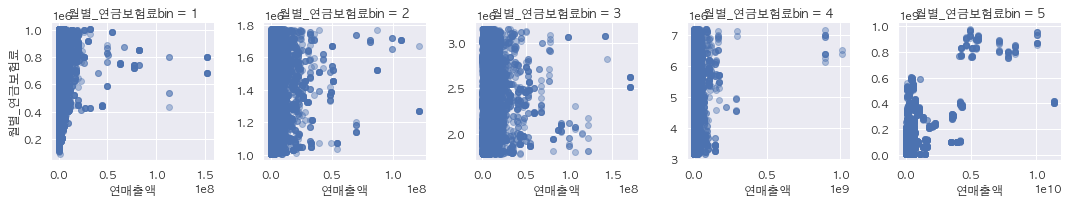

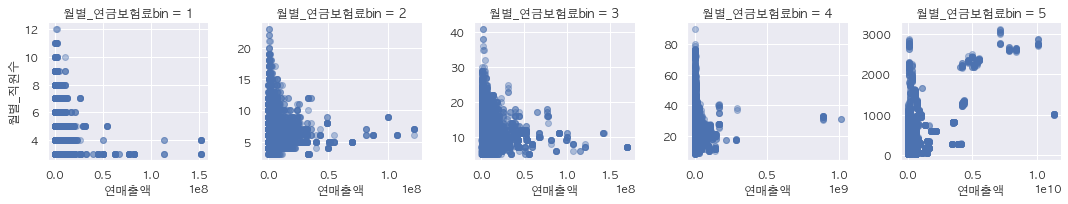

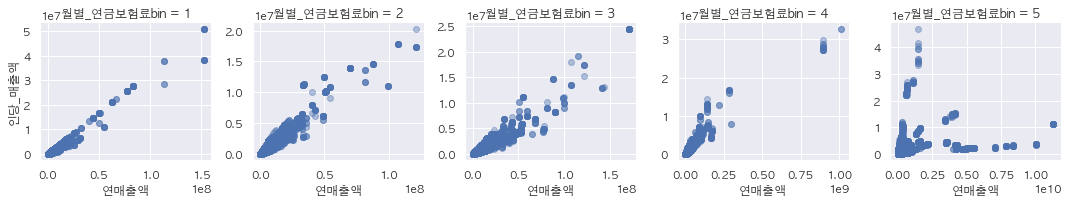

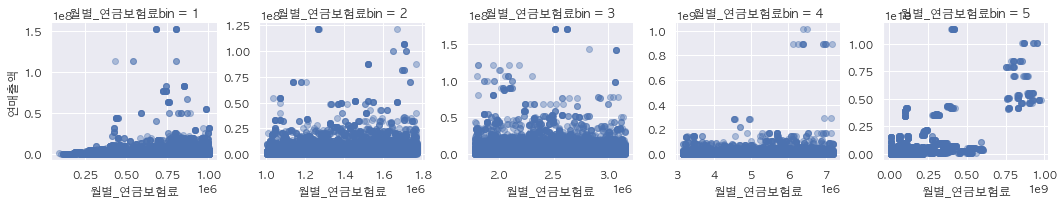

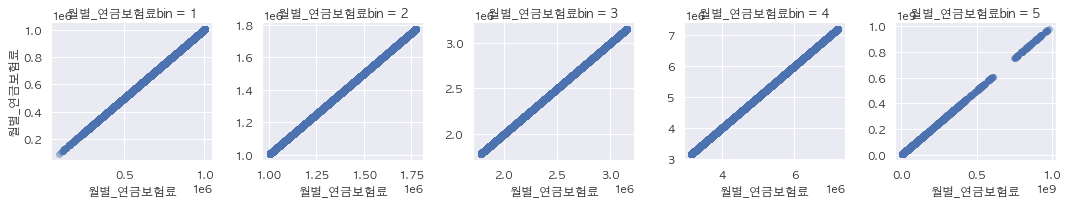

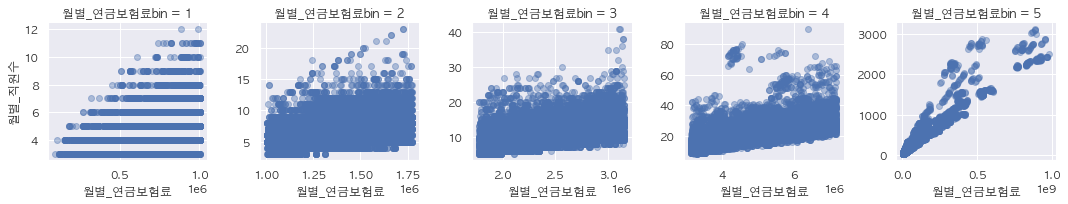

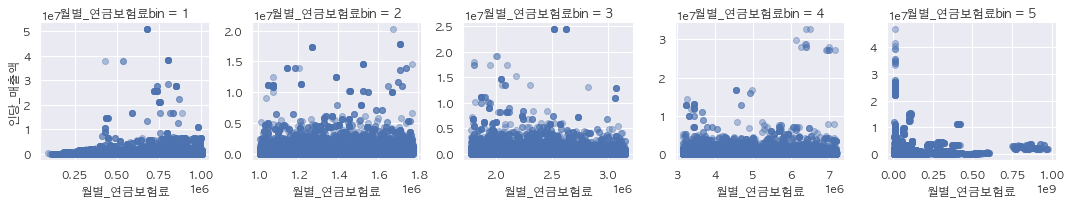

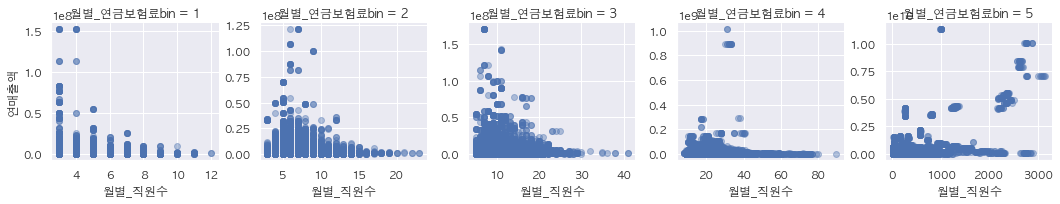

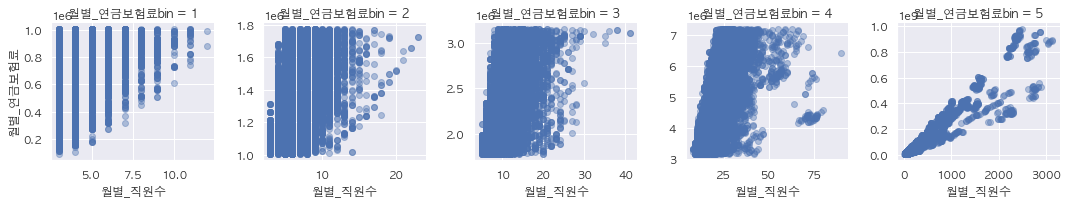

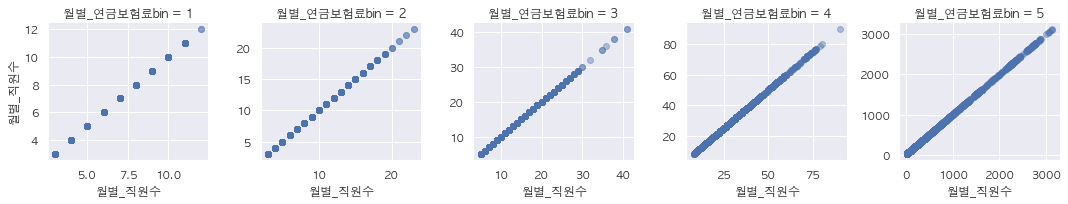

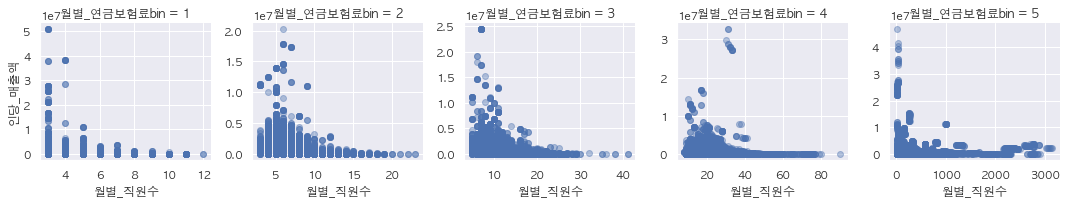

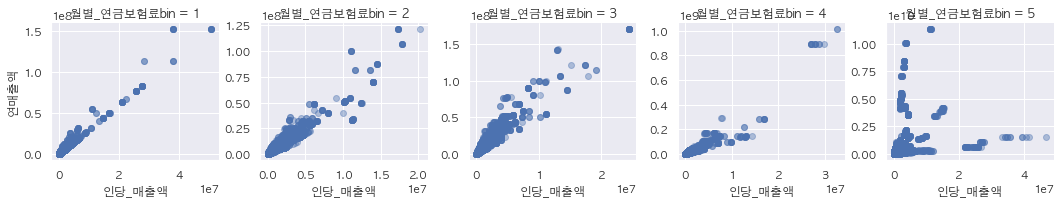

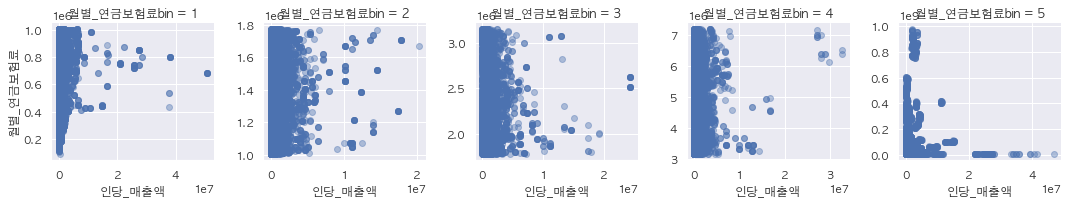

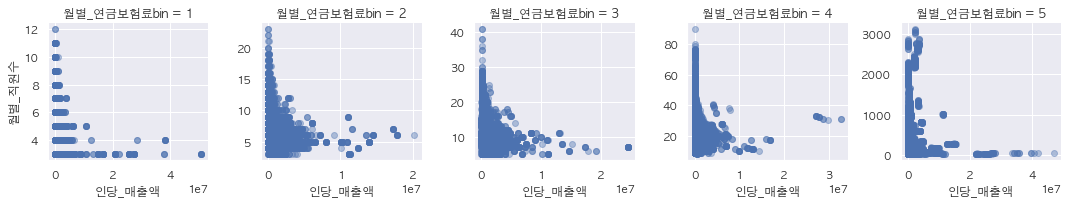

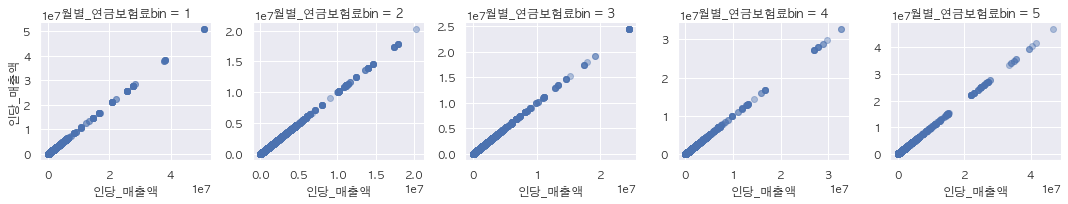

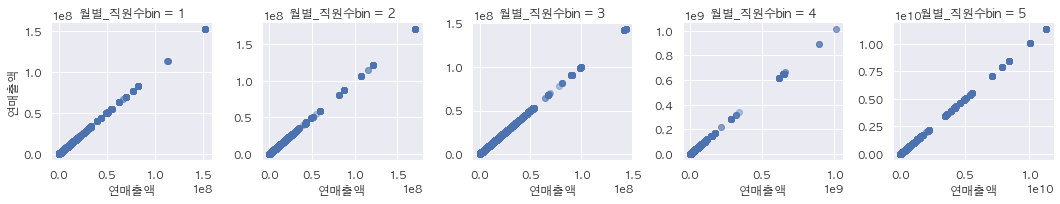

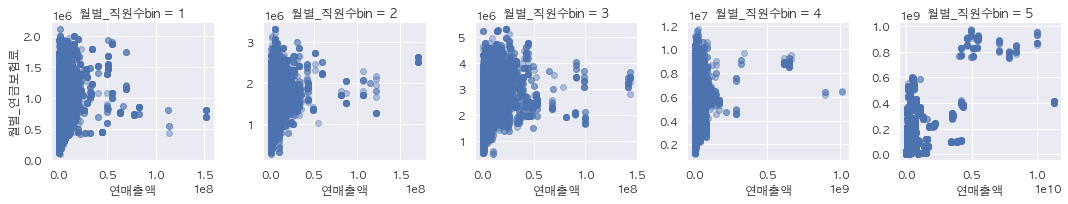

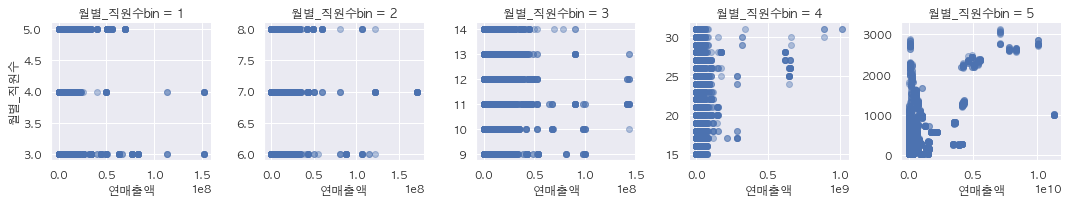

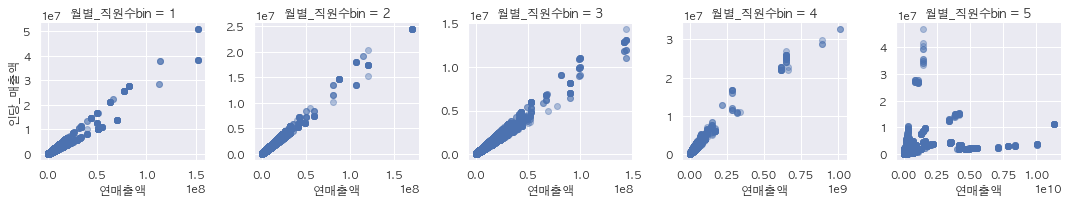

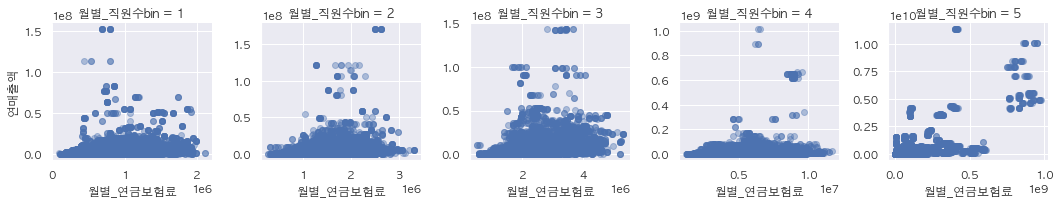

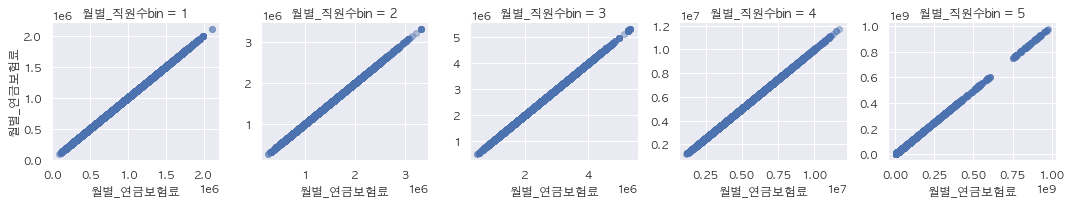

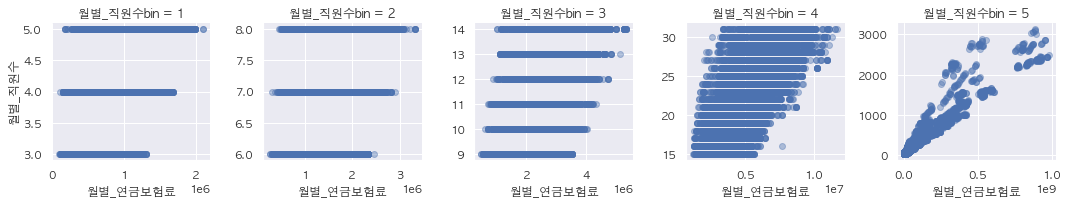

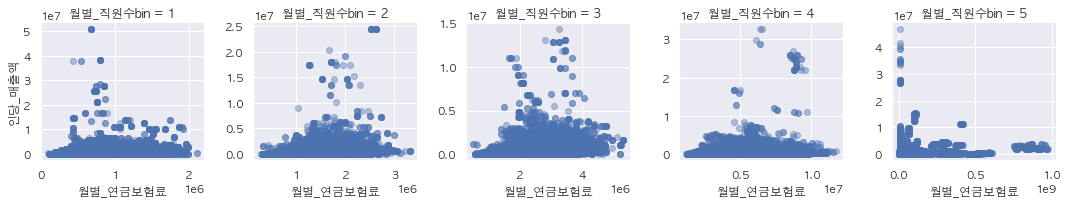

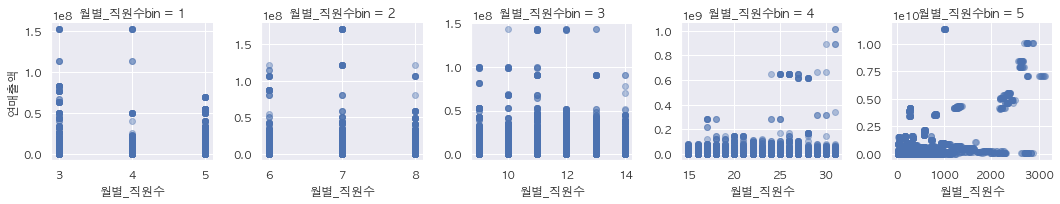

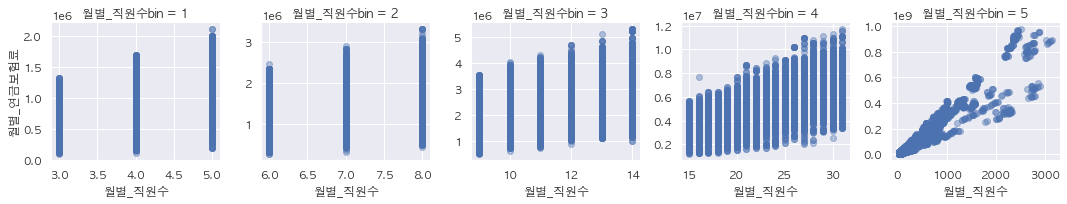

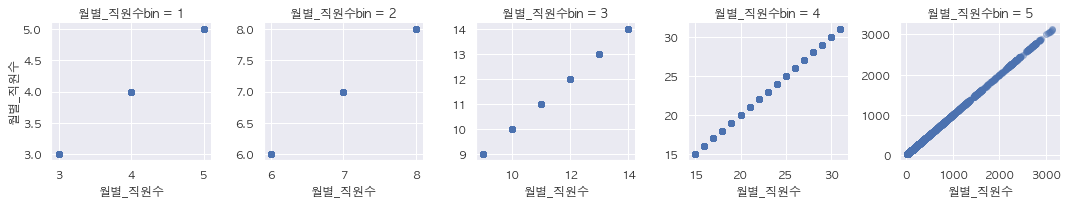

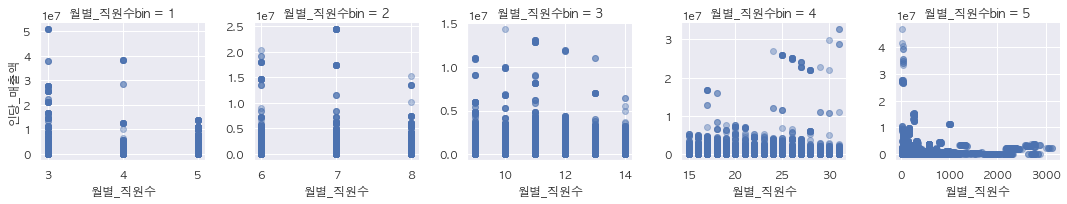

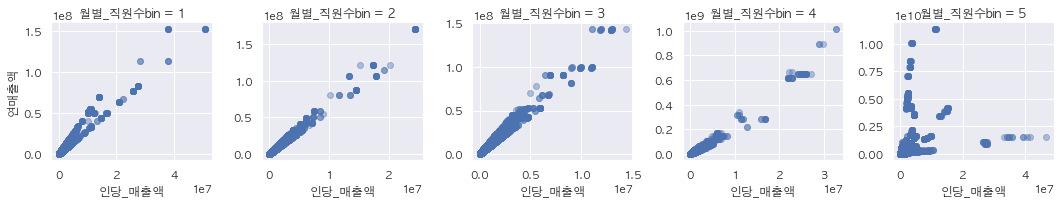

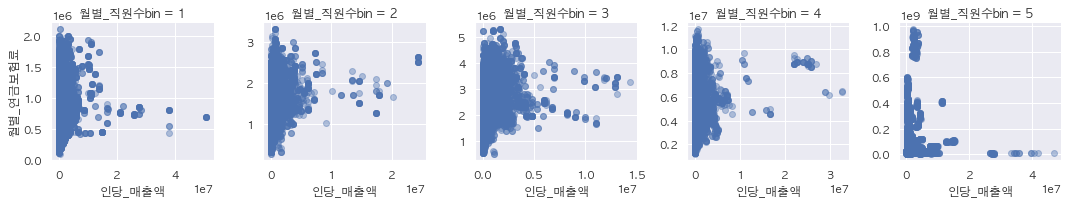

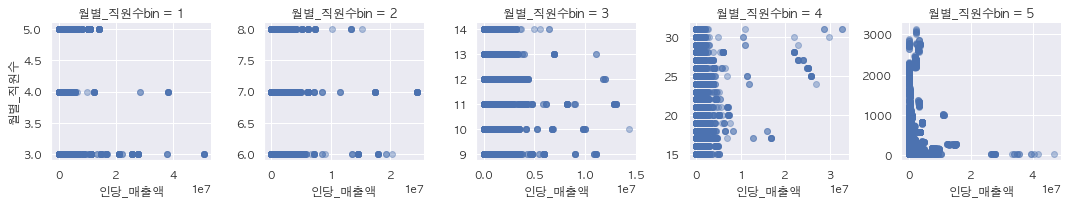

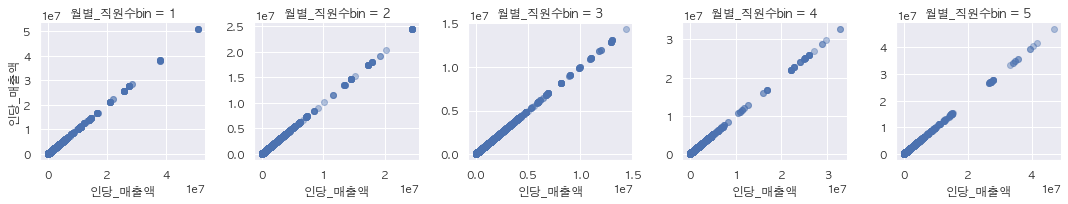

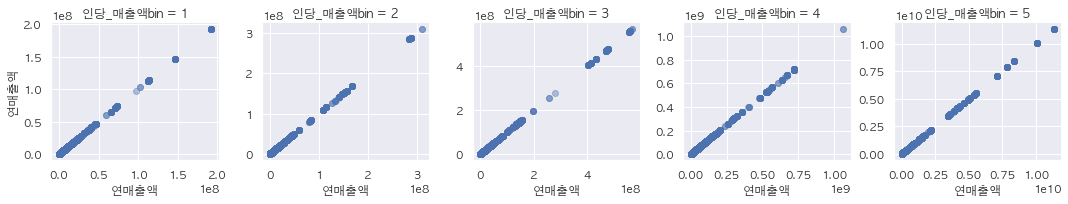

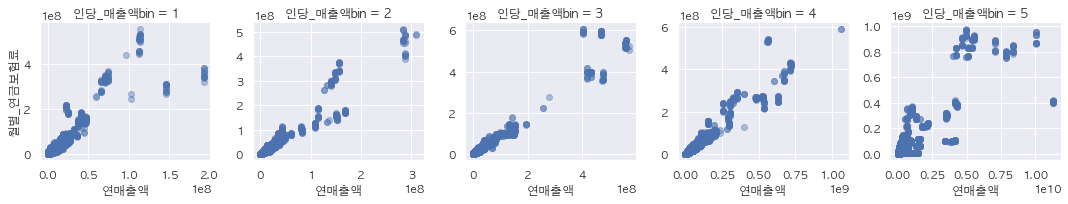

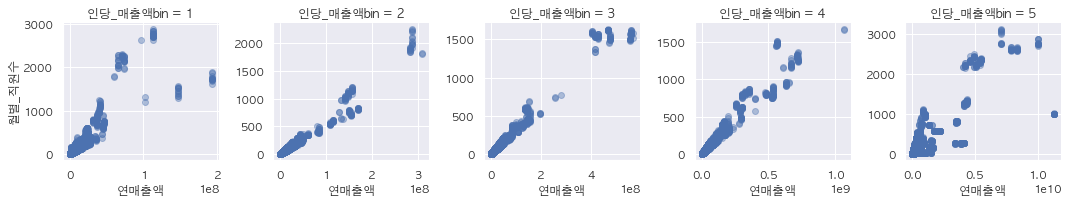

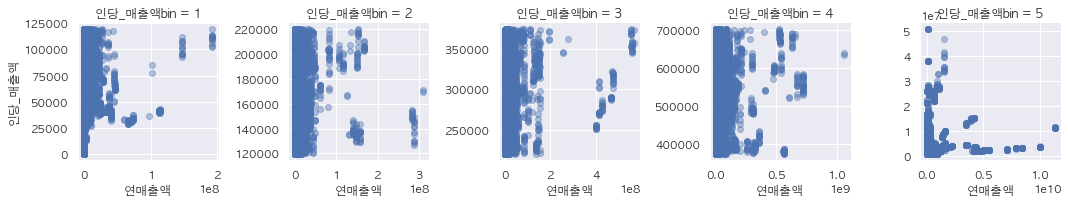

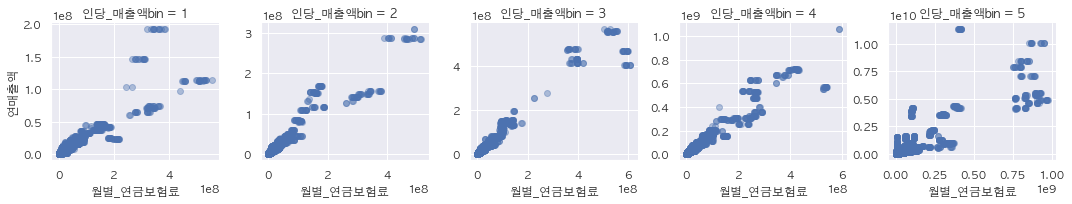

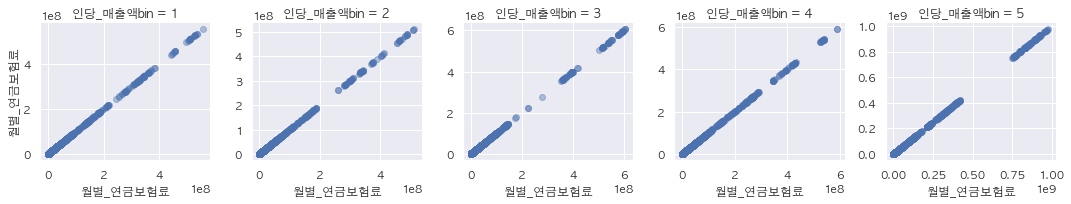

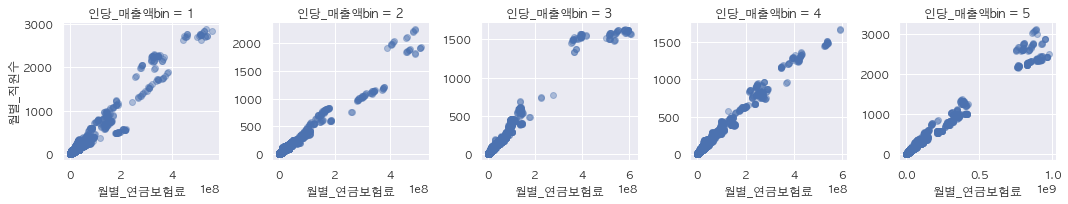

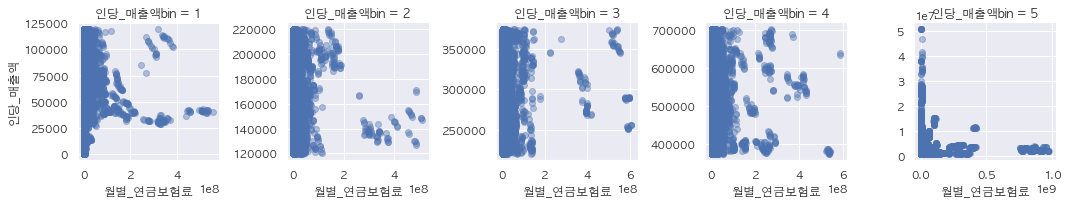

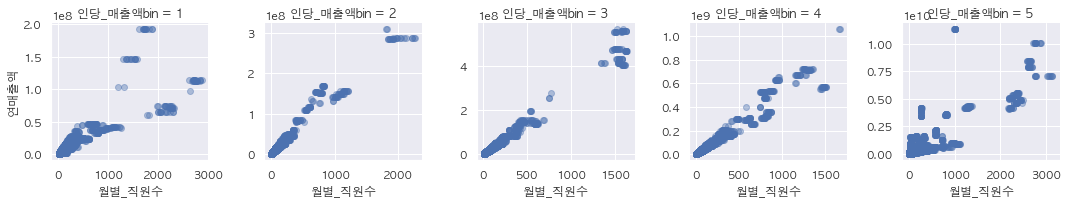

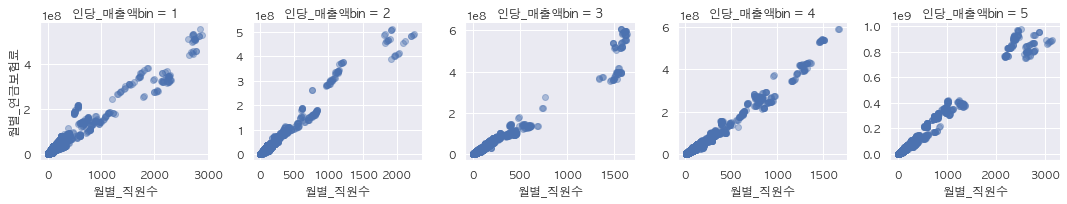

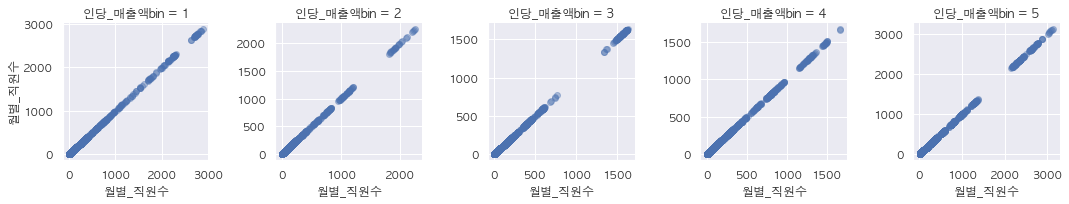

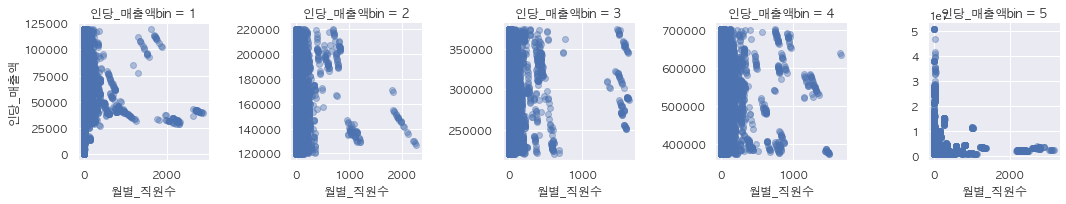

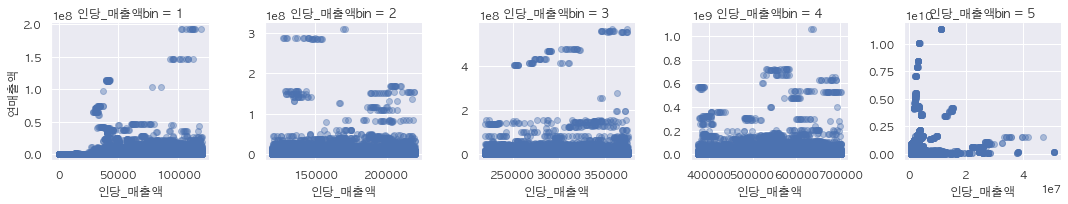

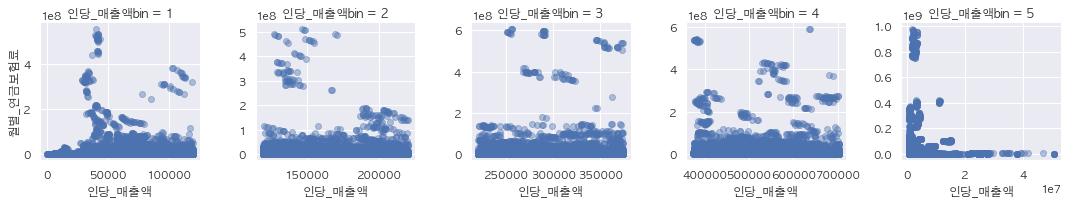

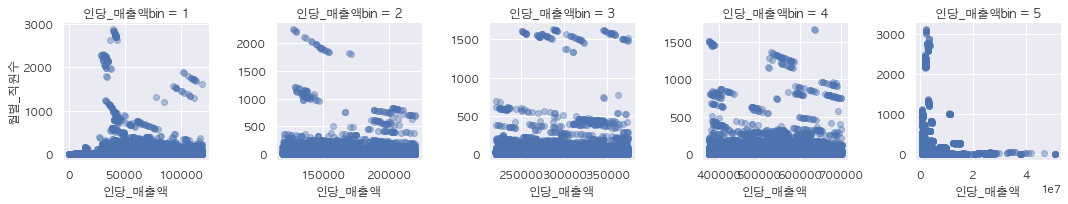

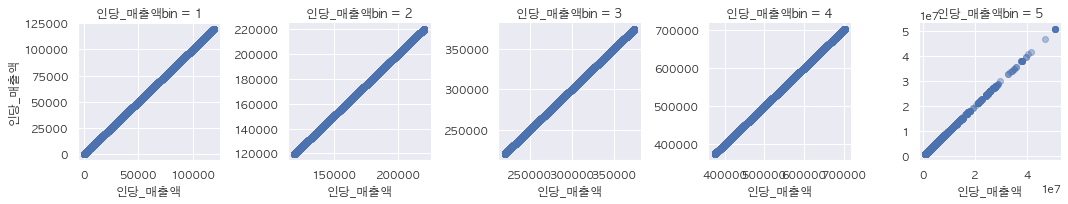

In [8]:
# 마스터 컬럼 리스트를 기준으로 구분
for column in boxplot_bin_column:
    
    for column_2 in boxplot_bin_column:
       
            # X, Y축 모두 '연매출액','월별_연금보험료','월별_직원수', '1인당_매출액' 네 가지 경우 모두 확인
            for column_3 in boxplot_bin_column:
                
                g = sns.FacetGrid(wanted_nps_df, col=column, sharex=False, sharey=False)
                g.map(plt.scatter, column_2[:-3], column_3[:-3], alpha = .4); #alpha는 점의 투명도

### &#9989; EDA 요약

- 연매출액, 월별 연금보험료, 월별 직원수가 큰 회사, 즉 회사의 규모가 커지면 커질수록 값의 분포가 넓게 나타난다.
- 연매출액이 가장 큰 규모의 회사들 중 월별 연금 보험료와 월별 직원수가 더 많아질수록 1인당 매출액이 작아진다.
- 직원이 많을수록 지급되는 급여(고정비)도 함께 많아지는 것으로 추측되며, 매출에 기여하는 직원별 가치는 비교적 적다고 판단된다.
------
1. 따라서 적정 수준의 직원과 연금보험료를 내면서도 높은 매출액을 유지하는 회사가 가치가 큰 것으로 보인다.
2. 연매출액 기준 규모가 큰 기업들을 선분류하고, 그 안에서 미시적인 분석을 진행한다.
3. 회사의 규모가 큰 그룹일수록 데이터의 분포가 매우 넓기 때문에, 값의 절대 가치보다는 성장률에 초점을 맞춰 분석을 진행한다.<br>(+ 급격한 매출의 성장은 실제 유니콘 기업 분석 결과를 통해서 확인할 수 있는 특징이다.)
------


### &#9989; 유니콘 기업 분석의 가설

#### &#10145; 가설

1. 한 번이라도 연매출액이 1,000억원을 초과하고, 월별 직원수가 1,000명 미만인 기업 중
2. **연매출액 성장률, 연 기준 월별 연금보험료 중위값 상승률, 연평균 직원수 상승률, 연평균 1인당 매출액 상승률**의 평균이<br>급상승한 기업이 유니콘 기업일 것이다.

#### &#10145; 가설의 근거

1. 대한민국 유니콘 기업의 등재 시점 기준 당시 연매출액은 1,000억원 이상이다. (에이프로젠 제약 제외)<br>따라서 주어진 데이터 중 연매출액 1,000억원 초과를 1번 조건으로 한다.<br>또한, 유니콘 기업이 비상장 기업임을 고려하여 대기업의 기준 중 하나로 보는 직원수 1,000명 미만을 조건으로 한다.
2. 연매출의 급성장은 유니콘 기업 선정의 중요 조건이다.<br>그 이유는 매출 급성장의 의미는 투자자로부터 비즈니스를 인정받아 큰 투자를 받았거나,<br>비즈니스 모델이 성공적으로 자리 잡았거나, 시장이 해당 기업을 원한다는 의미로 볼 수 있기 때문이다.<br>따라서 매출의 급성장을 유니콘 기업 선정의 주요 조건으로 설정한다.
3. 직원들의 높은 연봉은 회사의 가치를 나타내는 주요 지표 중 하나이다.<br>EDA 결과 일정 규모 이상의 연매출액이 발생하는 기업들은 직원수가 많아질수록 월별 연금 보험료가 자연스럽게 증가한다.<br>월별 연금보험료의 평균을 기준으로 보았을 때의 상승은 회사 연봉 테이블의 폭이 넓어졌다는 것으로도 해석할 수 있기 때문에<br>전체적인 직원 연봉의 상승을 확인하기 위해 월별 연금보험료의 중위값을 기준으로 상승률을 확인한다.<br>
4. 1인당 매출액은 기업이 내부의 리소스를 얼마나 효과적으로 쓰는지 보여주는 지표로 볼 수 있다.<br>2번과 3번 조건이 동일하다면, 더 효과적으로 리소스를 사용하는 기업이 더 높이 평가될 수 있다.
------
------

## &#128640; 유니콘 기업 선정 분석의 방법

1. 연매출액이 1,000억원을 초과하고, 직원수는 1,000명 미만의 기업 필터링
2. 연매출 성장률, 연평균 직원수 성장률, 연금보험료 중위값 상승률, 1인당 매출액 상승률을 바탕으로 유니콘 지수 산출
3. 유니콘 지수(P_unicorn)가 높은 기업 선정 (+클러스터링을 통한 Cross check)

### &#128246; P_unicorn = (0.5 * P_sales) + (0.2 * P_arpu) + (0.15 * P_pension) + (0.15 * P_employee)
- 각 항목이 유니콘 기업을 선정하는데 기여하는 정도를 고려하여<br>평가지수 별 가중치를 0.5/0.2/0.15/0.15로 선정 (가중치 값은 변경 가능)<br><br>- 가중치 선정의 이유:<br>- P_sales: 매출 성장은 기업 가치 평가의 가장 중요한 요인이기 때문에 가장 높은 가중치를 부여한다.<br>- P_arpu: 1인당 매출액의 높은 성장률은 기업의 리소스가 효과적으로 활용되는 증거라고 판단하여 보다 높은 가중치를 부여한다.<br>- P_pension, P_employee: 월별 연금보험료 중위값 상승과 월별 직원수 상승은 회사의 규모 및 직원의 가치 상승으로 판단하고 동일한 가중치를 부여한다.

### &#10145; 1. 연매출액이 1,000억원을 초과, 직원이 1,000명 미만의 기업 필터링
-----

In [9]:
# 분석을 위한 df 세팅
filtered_df = wanted_nps_df.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)

# 한 번이라도 연매출액 1,000억 초과, 직원수 1,000명 미만 회사 목록 출력
filtered_company_list = filtered_df.loc[(filtered_df['연매출액'] > 100000000) & (filtered_df['월별_직원수'] < 1000)].회사ID.unique()    

#추출된 회사 목록의 데이터 전부를 df로 저장
filtered_df = pd.DataFrame()
for id in filtered_company_list:
    
    filtered_df = pd.concat([filtered_df, wanted_nps_df.query(f'회사ID == {id}')]).reset_index().drop('index',axis=1)

filtered_df = filtered_df.astype({'회사ID':str, '년도':str, '월':str})
filtered_df['key'] = filtered_df['회사ID'] + "-" + filtered_df['년도']

print('filtered_df shape :', filtered_df.shape)
print('raw data 기업 수 :', wanted_nps_df['회사ID'].nunique())
print('분석대상금액 필터링 후 기업 수 :', filtered_df['회사ID'].nunique())

filtered_df shape : (2941, 12)
raw data 기업 수 : 4998
분석대상금액 필터링 후 기업 수 : 93


In [10]:
#filtered_df 통계
filtered_df.describe()

연매출액     월별_연금보험료  월별_직원수      인당_매출액
count        2941.00      2941.00 2941.00     2941.00
mean    429259711.41  91347730.28  298.17  3156156.49
std     948192774.74  98544326.27  299.00  6124336.52
min        188000.00    433060.00    3.00    31333.33
25%     108050157.00  24782660.00   84.00   541279.33
50%     152354246.00  59448460.00  185.00   982130.56
75%     363732805.00 118028860.00  397.00  2595460.06
max   11328779396.00 606774200.00 1932.00 50784748.67

### &#10145; 2. 유니콘 지수 산출
-----
#### 2-1. 유니콘 지수 산출을 위한 df 설계
- 연도별 회사ID의 연매출액 평균, 월별 연금보험료 중위값, 월별 직원수 평균, 인당 매출액 평균을 구한다.
- 비교 대상이 없는 결측치는 제거한다.

In [11]:
# 유니콘 지수 산출을 위한 filtered_df 집계
filtered_agg_df = filtered_df.sort_values('key').groupby('key').agg({'연매출액':'mean',
                                                           '월별_연금보험료':'median',
                                                           '월별_직원수':'mean',
                                                           '인당_매출액':'mean'}).rename(columns = 
                                                                                   {'월별_연금보험료':'월별_연금보험료_중위값',
                                                                                   '월별_직원수':'월평균_직원수',
                                                                                   '인당_매출액':'월평균_인당매출액'})
filtered_agg_df['회사ID'] = pd.DataFrame(filtered_agg_df.reset_index()['key'].str.split('-',2).tolist())[0].tolist()
filtered_agg_df.head()

연매출액  월별_연금보험료_중위값  월평균_직원수  월평균_인당매출액    회사ID
key                                                              
102-2018      742658938     173379370   752.12  988296.82     102
126516-2015  1061715908     589243890  1669.00  636144.66  126516
126516-2016   468913812     588353030  1620.25  289412.42  126516
126516-2017   402601664     589826050  1376.58  325600.36  126516
126606-2015   937184426     333420700   998.00  939062.55  126606

In [12]:
growth_df = filtered_agg_df.groupby('회사ID').pct_change().rename(columns = {'연매출액':'연매출액_성장률',
                                                                            '월별_연금보험료_중위값':'월별_연금보험료_성장률',
                                                                            '월평균_직원수':'월평균_직원수_성장률',
                                                                            '월평균_인당매출액':'월평균_인당매출액_성장률'})
# 비교 대상이 없는 결측치 제거
growth_df = growth_df.dropna()
# growth_df 통계 확인
growth_df.describe().transpose()

count  mean  std   min   25%  50%  75%   max
연매출액_성장률      214.00  0.35 3.34 -1.00 -0.05 0.05 0.17 46.60
월별_연금보험료_성장률  214.00  0.07 0.22 -0.52 -0.00 0.04 0.11  1.79
월평균_직원수_성장률   214.00  0.03 0.19 -0.45 -0.04 0.02 0.08  1.57
월평균_인당매출액_성장률 214.00  0.37 3.81 -1.00 -0.06 0.03 0.13 53.81

#### 2-2. 유니콘 지수 산출
1) 항목별 성장률을 7개로 bining하여 bin별로 Scoring (1~7점 부여)

In [13]:
n_bins = 7
bin_labels = list(range(1,n_bins+1))

for columns in ['연매출액_성장률', '월별_연금보험료_성장률', '월평균_직원수_성장률', '월평균_인당매출액_성장률']:
    new_column = columns.split('_성장률',2)[0] + "_score"
    growth_df.loc[:,new_column] = pd.qcut(growth_df[columns], n_bins, labels=bin_labels)
    
growth_df.sort_values('연매출액_score', ascending = False).head()

연매출액_성장률  월별_연금보험료_성장률  월평균_직원수_성장률  월평균_인당매출액_성장률 연매출액_score  \
key                                                                          
433492-2016      0.34         -0.08        -0.12           0.57          7   
469677-2017      0.39          0.13         0.20           0.17          7   
231384-2017      0.43         -0.19        -0.27           0.93          7   
430504-2016      1.10         -0.09        -0.15           1.53          7   
231606-2016      0.62          0.07         0.08           0.50          7   

            월별_연금보험료_score 월평균_직원수_score 월평균_인당매출액_score  
key                                                       
433492-2016              1             1               7  
469677-2017              6             7               6  
231384-2017              1             1               7  
430504-2016              1             1               7  
231606-2016              5             6               7

2) 항목별 Score에 가중치 부여

In [14]:
f_growth_df = growth_df.astype({'연매출액_score':float,
                                '월별_연금보험료_score':float,
                                '월평균_직원수_score':float,
                                '월평균_인당매출액_score':float})

growth_df['P_sales'] = 0.5 * f_growth_df['연매출액_score']
growth_df['P_arpu'] = 0.2 * f_growth_df['월평균_인당매출액_score']
growth_df['P_pension'] = 0.15 * f_growth_df['월별_연금보험료_score']
growth_df['P_employee'] = 0.15 * f_growth_df['월평균_직원수_score']
growth_df['P_unicorn'] = growth_df['P_sales'] + growth_df['P_arpu'] +growth_df['P_pension'] + growth_df['P_employee']

3) '회사ID'별 최종 평균 점수 만들기

In [15]:
unicorn_df = growth_df.copy().drop(['연매출액_성장률',
                                    '월별_연금보험료_성장률',
                                    '월평균_직원수_성장률',
                                    '월평균_인당매출액_성장률',
                                    '연매출액_score',
                                    '월별_연금보험료_score',
                                    '월평균_직원수_score',
                                    '월평균_인당매출액_score'], axis=1)
unicorn_df['회사ID'] = pd.DataFrame(growth_df.reset_index()['key'].str.split('-',2).tolist())[0].tolist()
unicorn_df = unicorn_df.groupby('회사ID').mean()
ten_unicorn_df = unicorn_df.sort_values('P_unicorn', ascending = False).head(10)

In [16]:
ten_unicorn_df

P_sales  P_arpu  P_pension  P_employee  P_unicorn
회사ID                                                     
127366     3.33    1.20       0.85        0.85       6.23
420165     3.25    1.30       0.82        0.82       6.20
469677     3.33    1.00       0.85        0.90       6.08
294530     3.00    1.00       1.00        1.00       6.00
420046     3.00    1.20       0.90        0.82       5.92
403470     3.33    0.67       0.95        0.95       5.90
295618     2.83    0.87       0.90        0.90       5.50
232757     2.67    0.93       0.90        0.90       5.40
382850     2.83    0.67       0.80        1.00       5.30
127669     2.67    0.67       0.95        1.00       5.28

### &#9989; P_unicorn 점수를 기준으로 10개 회사를 선정하였다.

### &#10145; 3. 클러스터링을 통한 선정 기업 Cross Check
-----

#### 클러스터링(Clustering) 

- 클러스터 : 데이터 포인트 (data objects)의 모임으로 같은 그룹(or cluster) 안에서는 서로 비슷하고, 다른 그룹 사이에는 안 비슷한 모양
- 클러스터 분석 또는 클러스터링 (clustering, data segmentation, ...) : 데이터 포인트들을 받아서 그룹들(cluster)로 나누는 것
- 비지도 학습인 클러스터링은 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다.
- data set에서 하위그룹(subgroup), 즉 클러스터(cluster)를 찾는 것이다.

#### Hierarchical clustering

* 몇개의 클러스터를 원하는지 모를 때
* 데이터가 dendrogram이라는 트리 모양으로 나타내진다.
* 그 뒤 몇 개의 클러스터를 원하는지 선택한다.
-------
- 출처: https://astralworld58.tistory.com/58

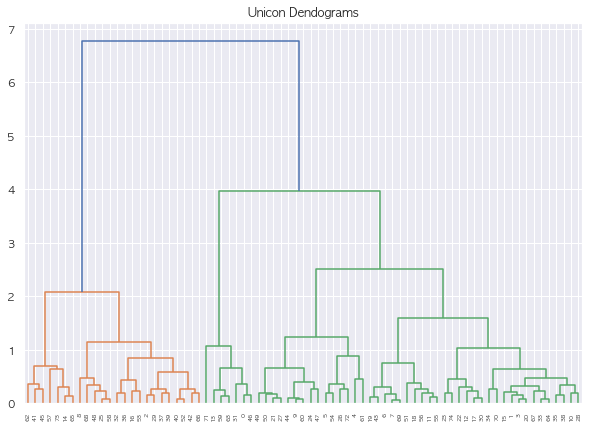

In [17]:
# clustering의 기준: 4개의 Scores
data = unicorn_df.iloc[:,0:4].values

# Dendrograms 시각화
plt.figure(figsize=(10, 7))
plt.title("Unicon Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

### &#10004; ***Dendrogram을 보고 클러스터를 6개로 구분한다.***

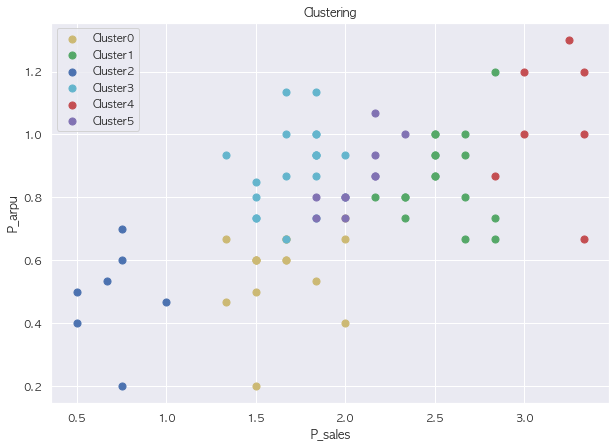

In [18]:
# 클러스터 레이블 확인
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

# 6개 클러스터별 색 구분하여 표시
# P_sales, P_arpu를 축으로 사용
plt.figure(figsize=(10, 7))

plt.scatter(data[cluster.labels_==0, 0], data[cluster.labels_==0, 1], s=50, c='y', label='Cluster0')
plt.scatter(data[cluster.labels_==1, 0], data[cluster.labels_==1, 1], s=50, c='g', label='Cluster1')
plt.scatter(data[cluster.labels_==2, 0], data[cluster.labels_==2, 1], s=50, c='b', label='Cluster2')
plt.scatter(data[cluster.labels_==3, 0], data[cluster.labels_==3, 1], s=50, c='c', label='Cluster3')
plt.scatter(data[cluster.labels_==4, 0], data[cluster.labels_==4, 1], s=50, c='r', label='Cluster4')
plt.scatter(data[cluster.labels_==5, 0], data[cluster.labels_==5, 1], s=50, c='m', label='Cluster5')

plt.title('Clustering')
plt.xlabel('P_sales')
plt.ylabel('P_arpu')
plt.legend()
plt.show()

In [19]:
# Dendrograms으로 분류된 클러스터, 기존 df에 추가
cluster_df = pd.DataFrame([unicorn_df.index.tolist(),list(cluster.labels_)]).transpose()
cluster_df.columns = ['회사ID', 'Cluster']
unicorn_cluster_df = pd.merge(unicorn_df, cluster_df, left_on=unicorn_df.index, right_on='회사ID', how='inner')

### &#10004; ***유니콘 기업 선정***

In [20]:
# 클러스터의 가장 우상향에 있는 4번 클러스터 필터링
unicorn_cluster_df = unicorn_cluster_df.query('Cluster == 4')
unicorn_cluster_df.sort_values('P_unicorn', ascending=False)

P_sales  P_arpu  P_pension  P_employee  P_unicorn    회사ID Cluster
14     3.33    1.20       0.85        0.85       6.23  127366       4
65     3.25    1.30       0.82        0.82       6.20  420165       4
73     3.33    1.00       0.85        0.90       6.08  469677       4
41     3.00    1.00       1.00        1.00       6.00  294530       4
62     3.00    1.20       0.90        0.82       5.92  420046       4
57     3.33    0.67       0.95        0.95       5.90  403470       4
45     2.83    0.87       0.90        0.90       5.50  295618       4

In [21]:
pick_unicorn_df = pd.merge(unicorn_cluster_df, ten_unicorn_df, on='회사ID', how = 'inner')
pick_unicorn_df.drop(['P_sales_x',
                      'P_arpu_x',
                      'P_pension_x',
                      'P_employee_x',
                      'P_unicorn_x',
                      'Cluster',
                      'P_sales_y',
                      'P_arpu_y',
                      'P_pension_y',
                      'P_employee_y'], axis=1).rename(columns=({'P_unicorn_y' : 'P_unicorn'})).sort_values('P_unicorn', ascending=False)

회사ID  P_unicorn
0  127366       6.23
5  420165       6.20
6  469677       6.08
1  294530       6.00
4  420046       5.92
3  403470       5.90
2  295618       5.50

## &#128640; 2차 분석 결과 선정된 유니콘 기업 List (P_score와 클러스터링 결과의 교집합)
### - 127366 (6.23)
### - 420165 (6.20)
### - 469677 (6.08)
### - 294530 (6.00)
### - 420046 (5.92)
### - 403470 (5.90)
### - 295618 (5.50)

![선정 기업 시각화](https://i.esdrop.com/d/FZOd4SBQWQ.png)